In [1]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu

In [2]:
colors_main = ['black', 'red', 'green', 'yellow', 'blue', 'magenta', 'orange', 'grey']
colors = [ 'dimgrey', 'lightcoral', 'saddlebrown', 'darkorange', 'darkgoldenrod', 'darkkhaki',
         'greenyellow', 'lime', 'teal', 'deepskyblue', 'royalblue', 'navy', 'blueviolet', 'violet',
         'deeppink']

In [3]:
markersize = 8
markevery = 20
linewidth = 1
marker = '*'
styles = {}

#styles['svrg_ada_old'] = {'label':'AdaSVRG - old linesearch','linewidth':linewidth, 'color':colors_main[0], 
 #                    'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_ada_new'] = {'label':'AdaSVRG','linewidth':linewidth, 'color':colors_main[1], 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_ada_at_1e-3'] = {'label':'AdaSVRG - adaptive termination','linewidth':linewidth, 'color':colors_main[0], 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

#styles['svrg_ada_at_1e-4'] = {'label':'AdaSVRG - at - thresh=1e-4','linewidth':linewidth, 'color':colors_main[4], 
 #                    'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_0.001'] = {'label':'SVRG:1e-3','linewidth':linewidth, 'color':colors_main[5], 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_0.01'] = {'label':'SVRG:1e-2','linewidth':linewidth, 'color':colors_main[6], 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_0.1'] = {'label':'SVRG:1e-1','linewidth':linewidth, 'color':colors_main[7], 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

styles['svrg_1'] = {'label':'SVRG:1','linewidth':linewidth, 'color':colors_main[2], 
                     'marker':marker, 'markersize':markersize, 'markevery':markevery }

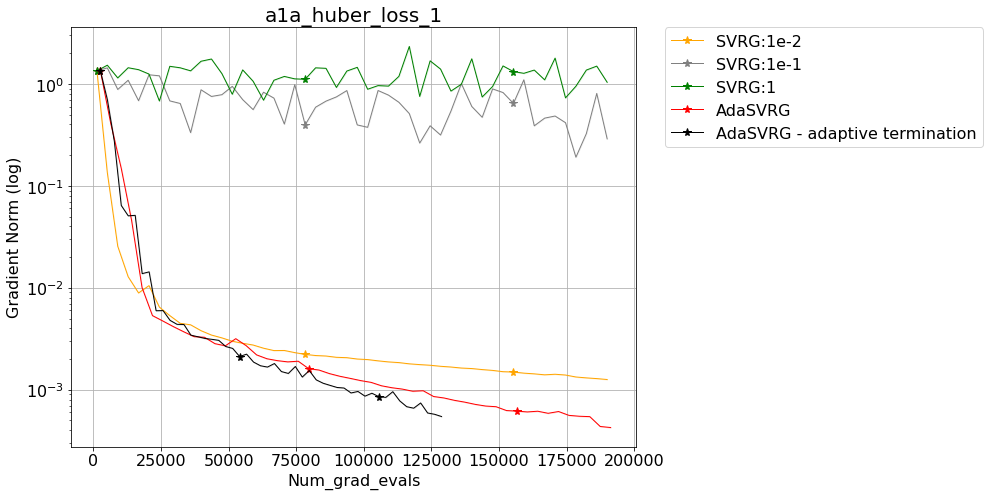

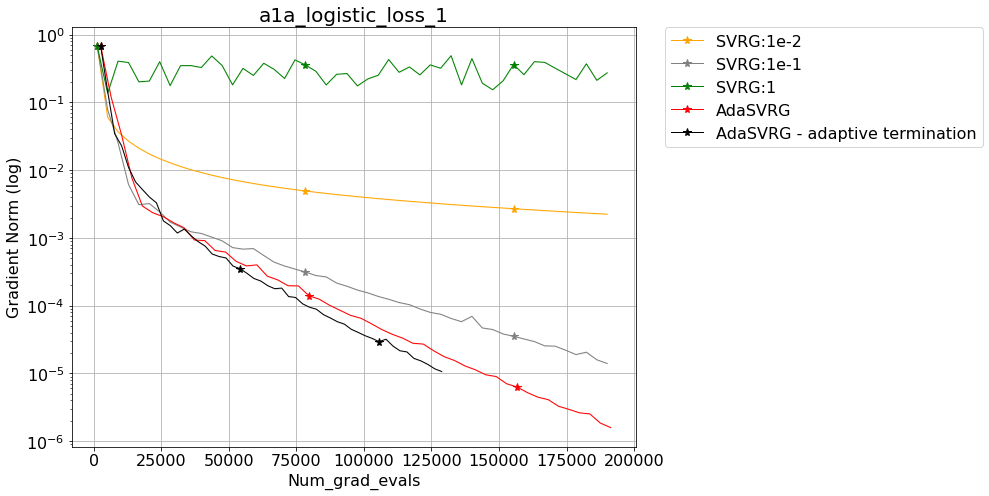

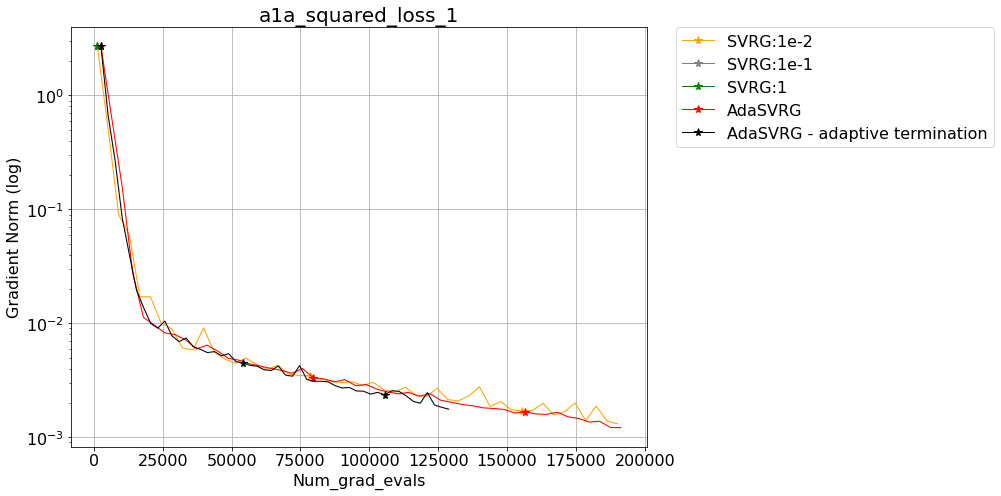

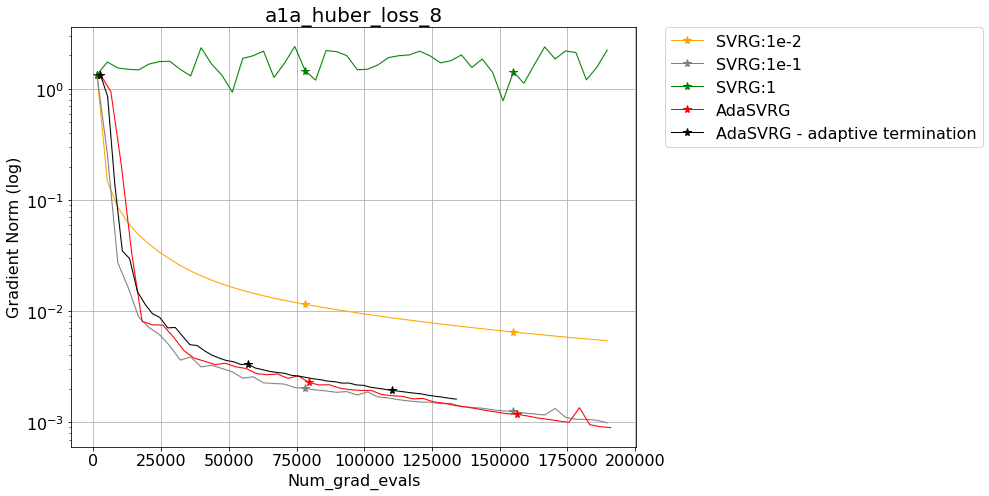

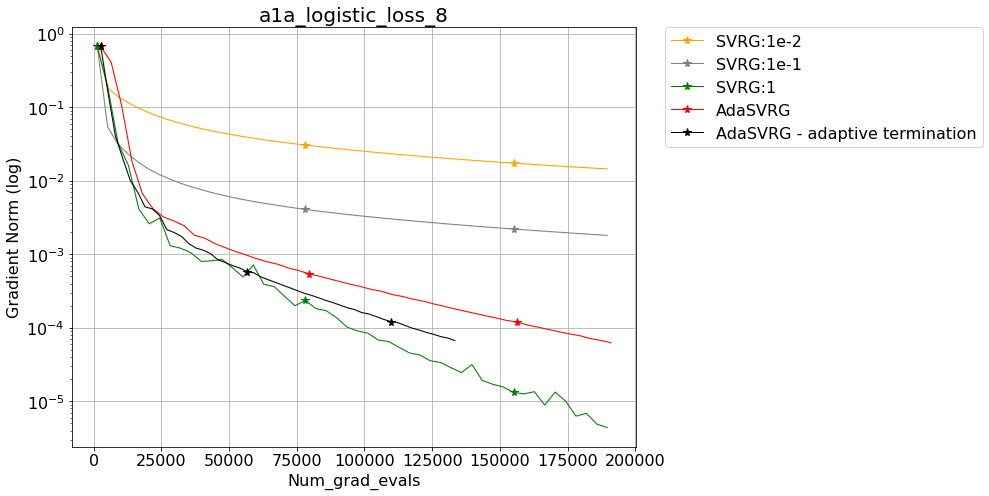

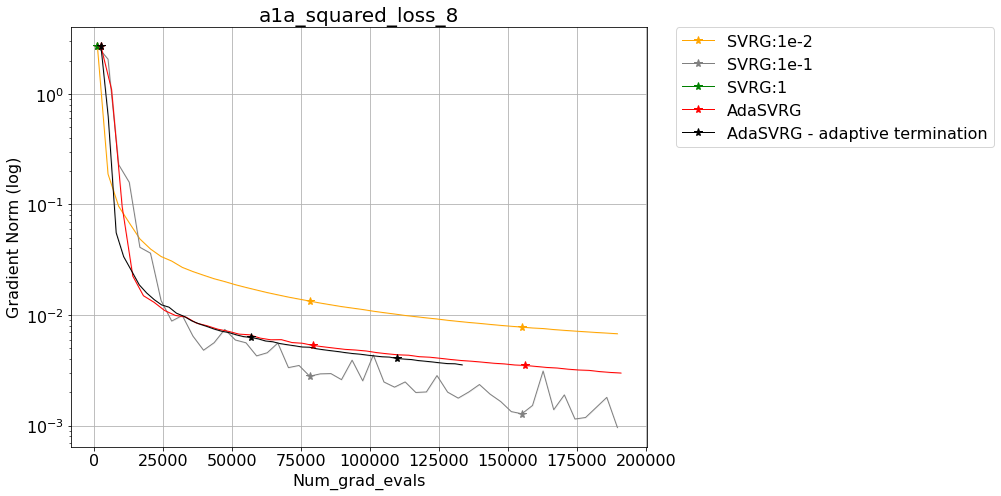

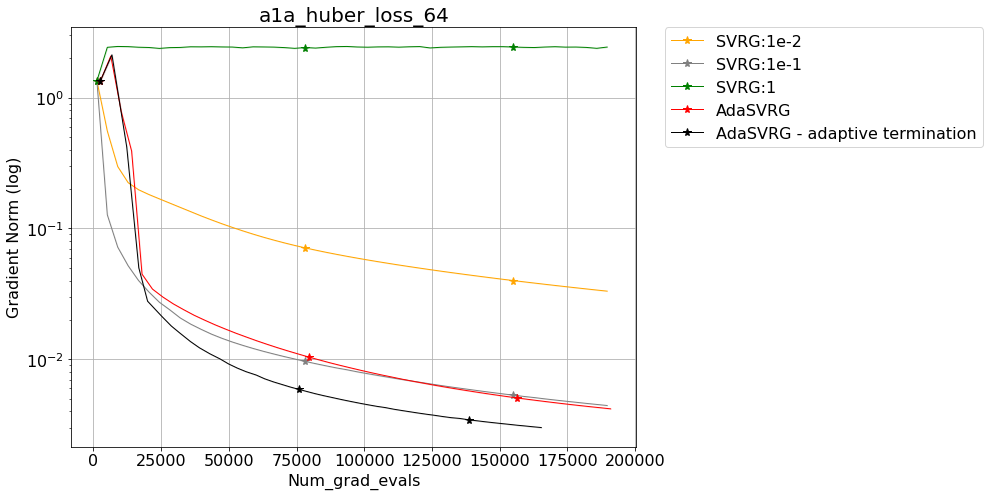

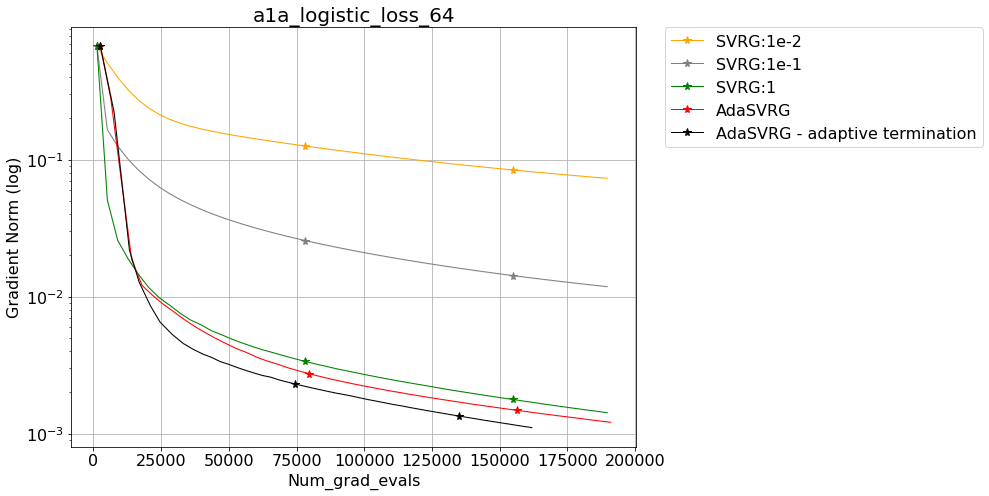

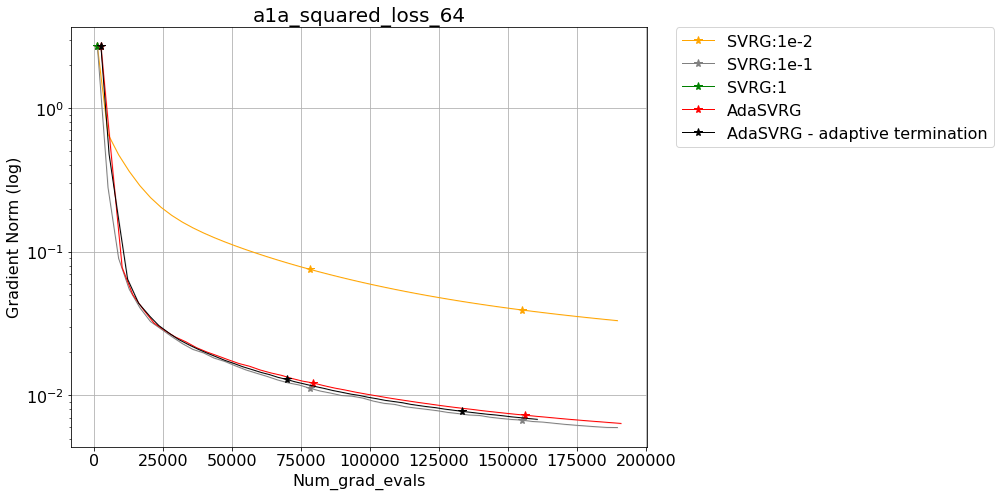

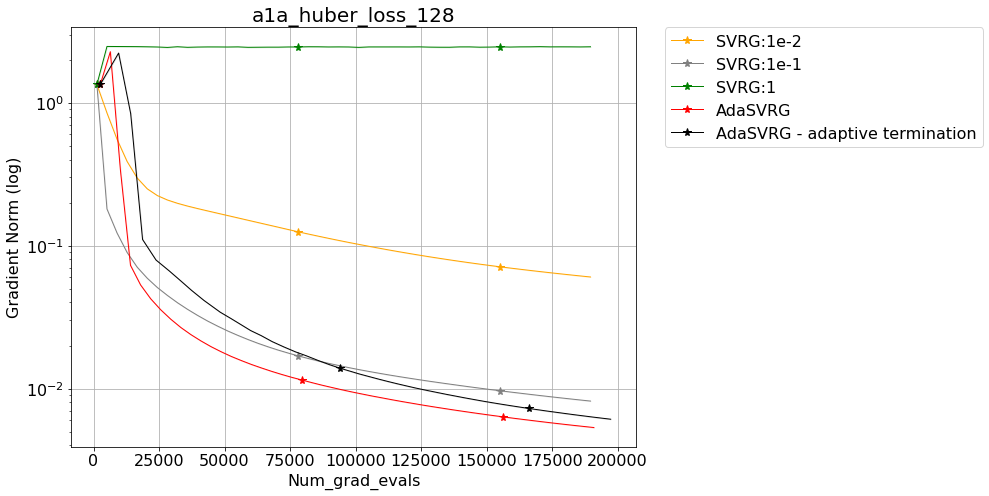

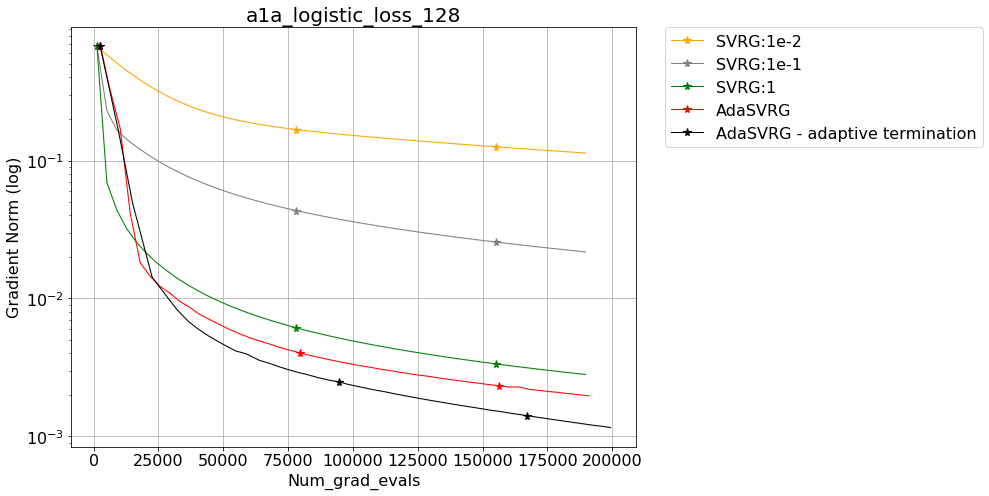

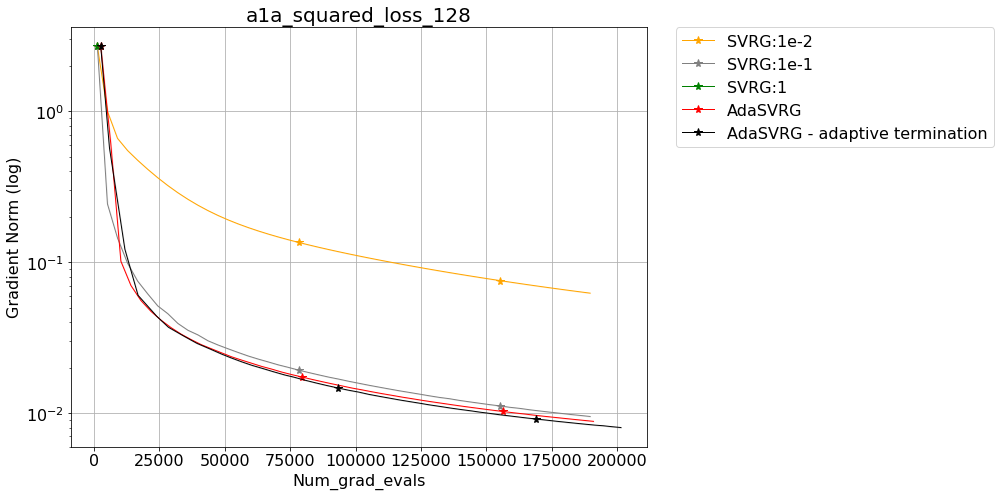

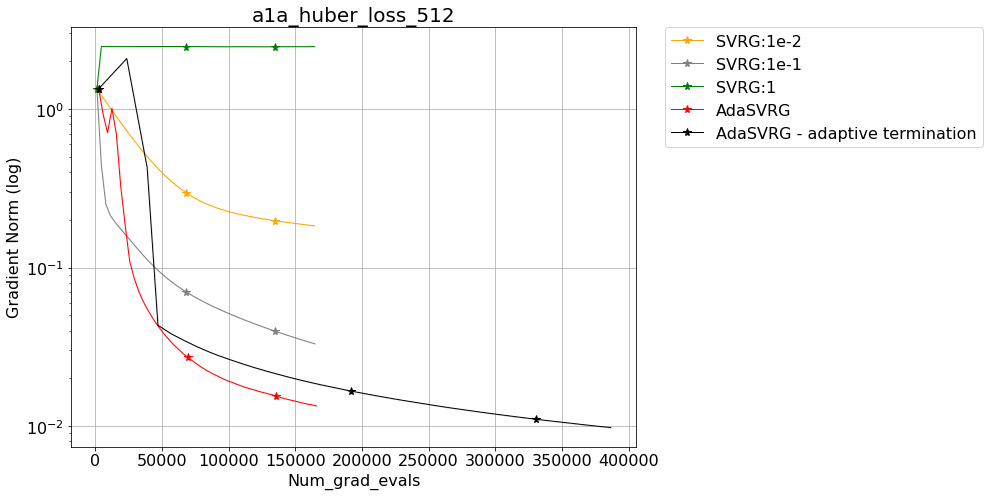

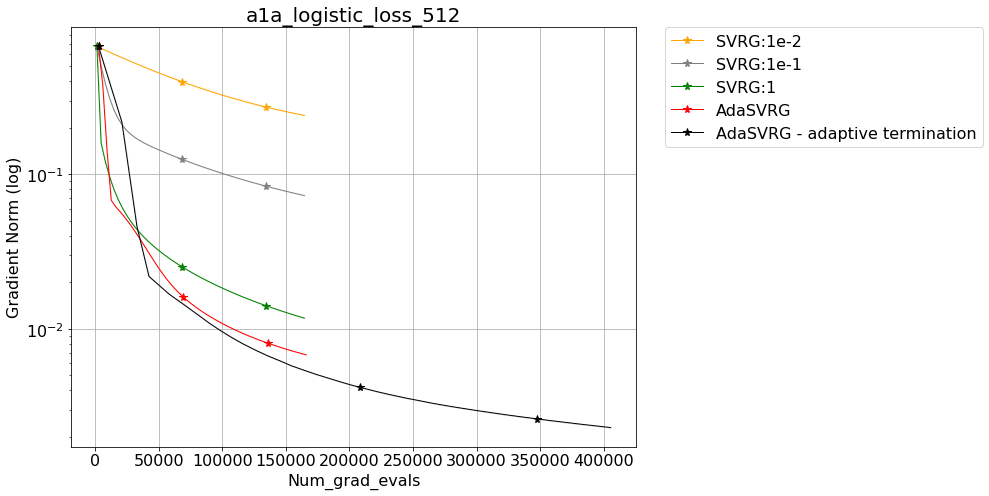

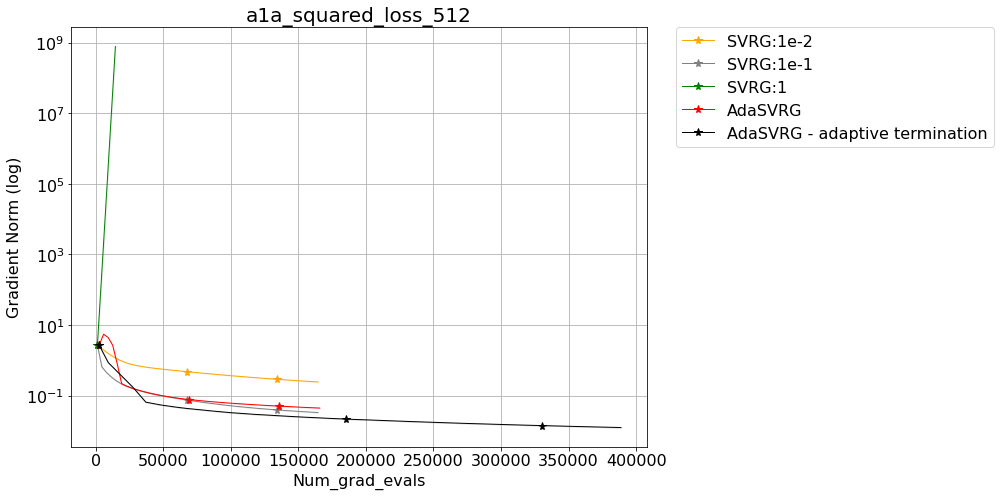

In [4]:
savedir_base = "./results_a1a_main"
exp_config_fname = './exp_configs.py'
exp_list = []
batch_size = 1

for exp_group in [
    "exp_a1a",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
      # {'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )


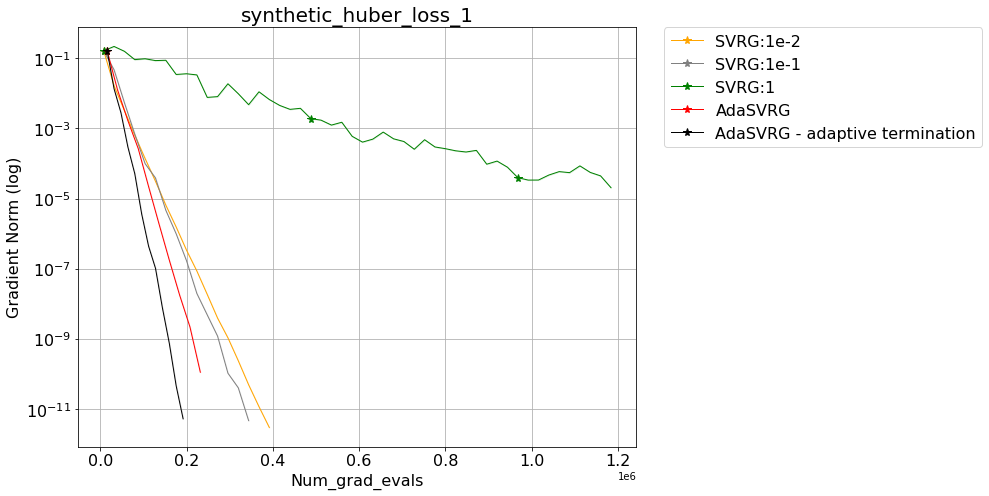

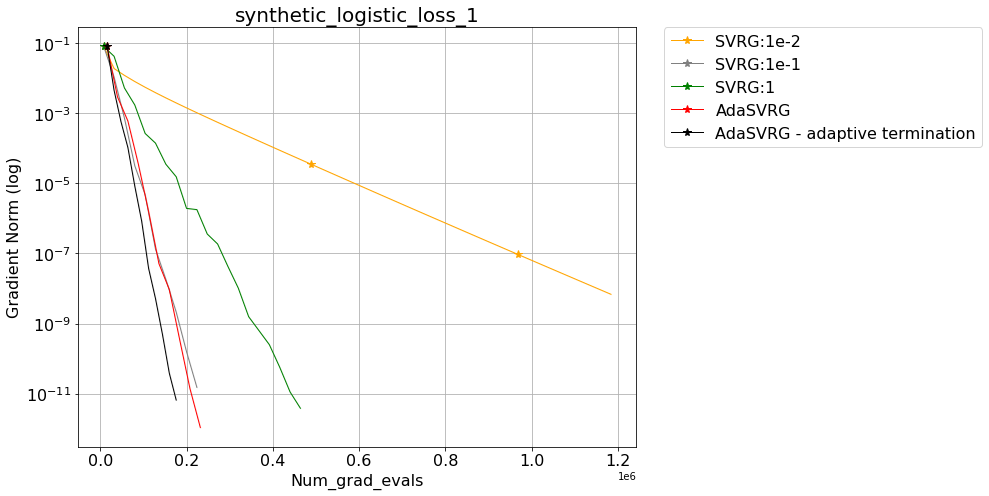

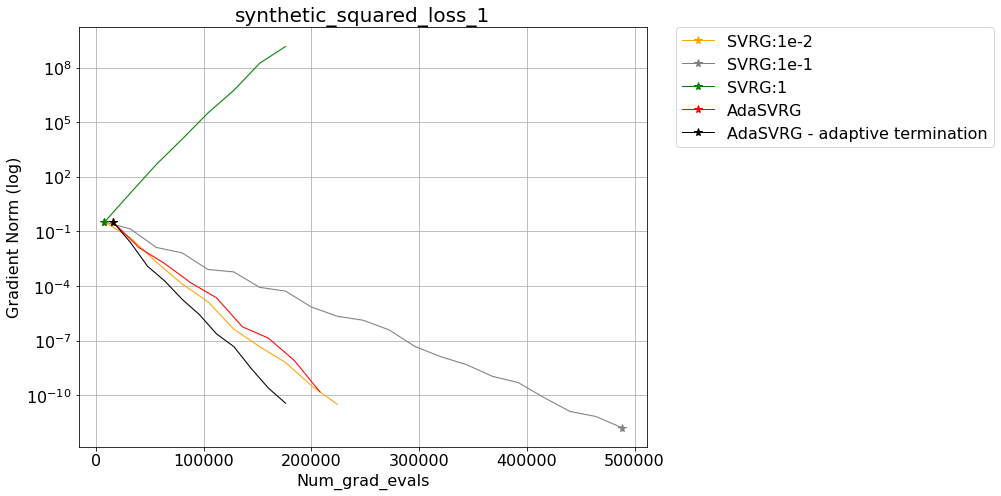

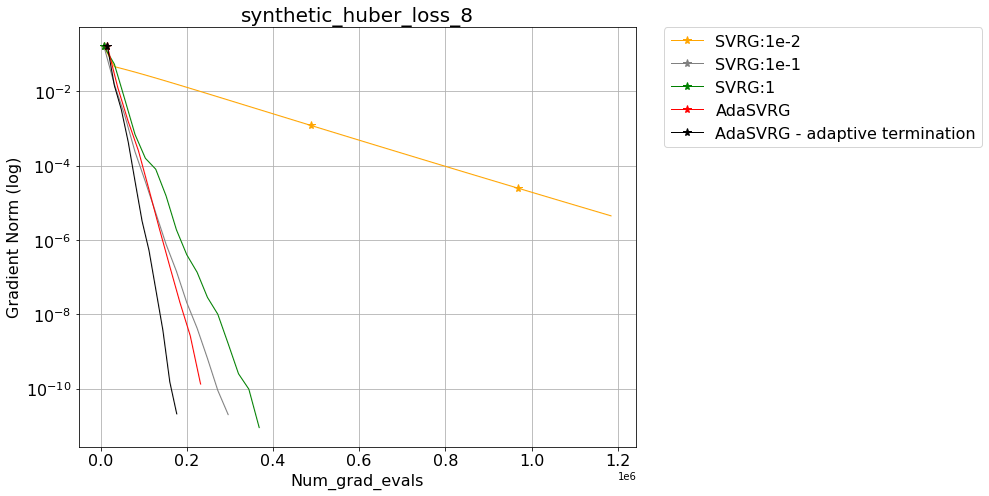

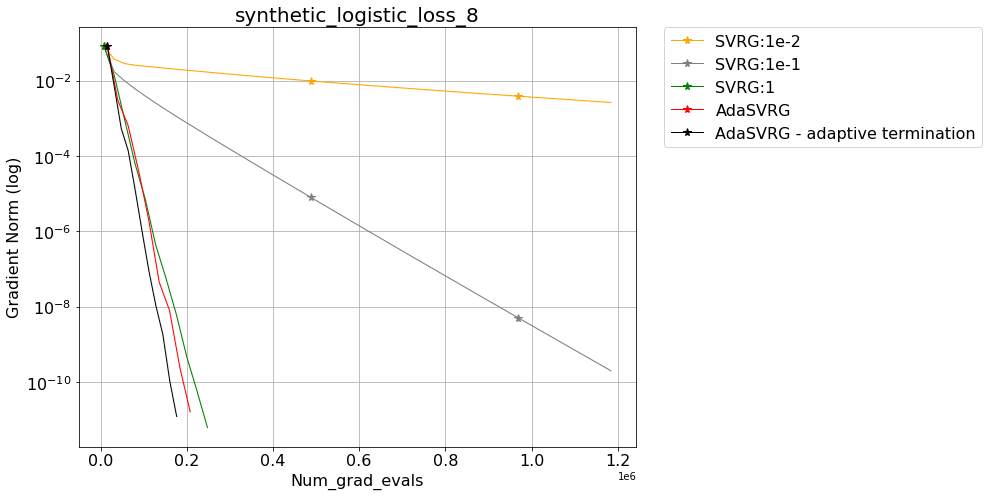

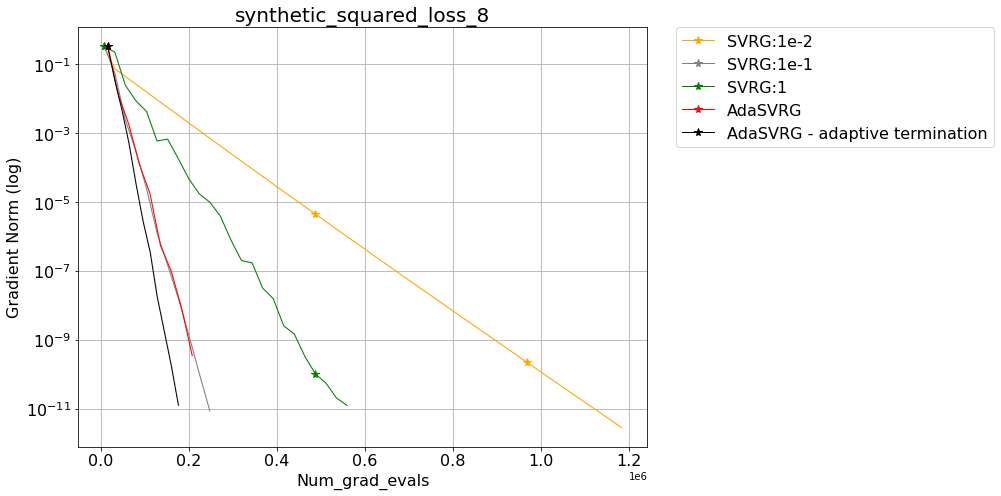

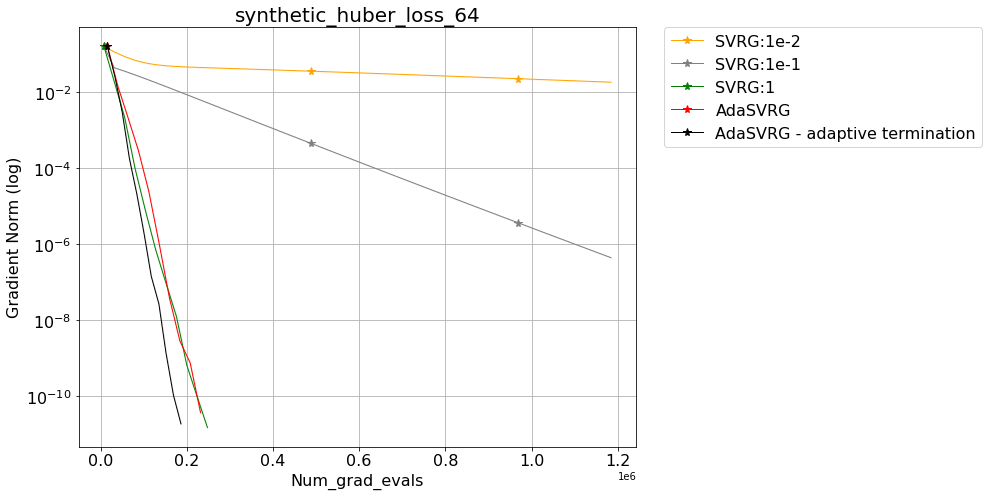

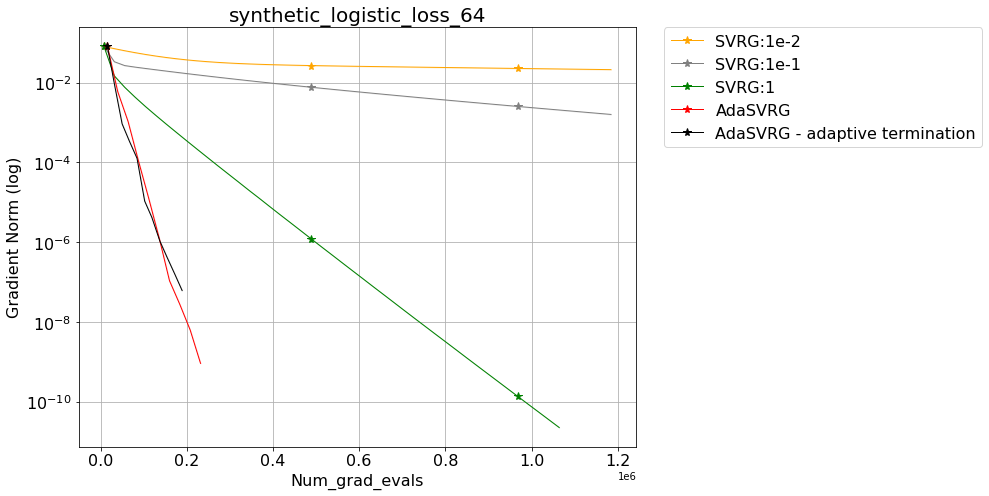

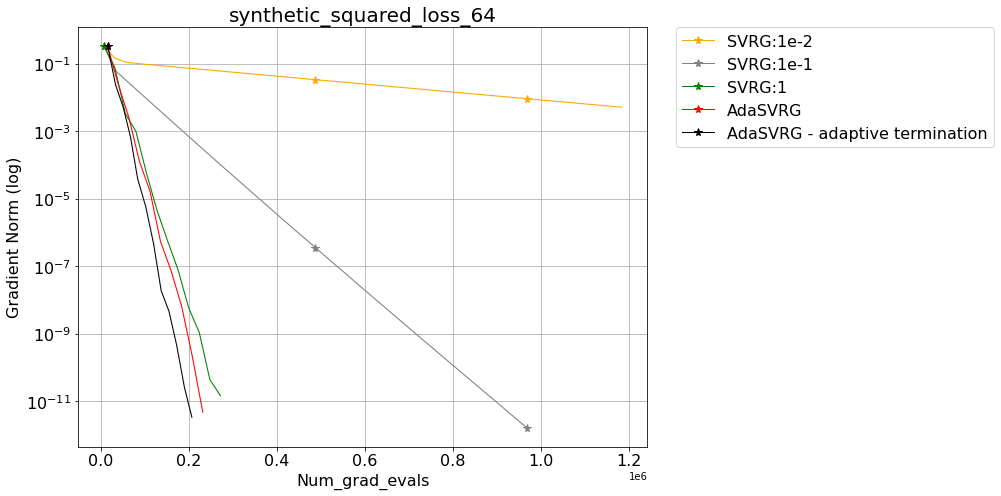

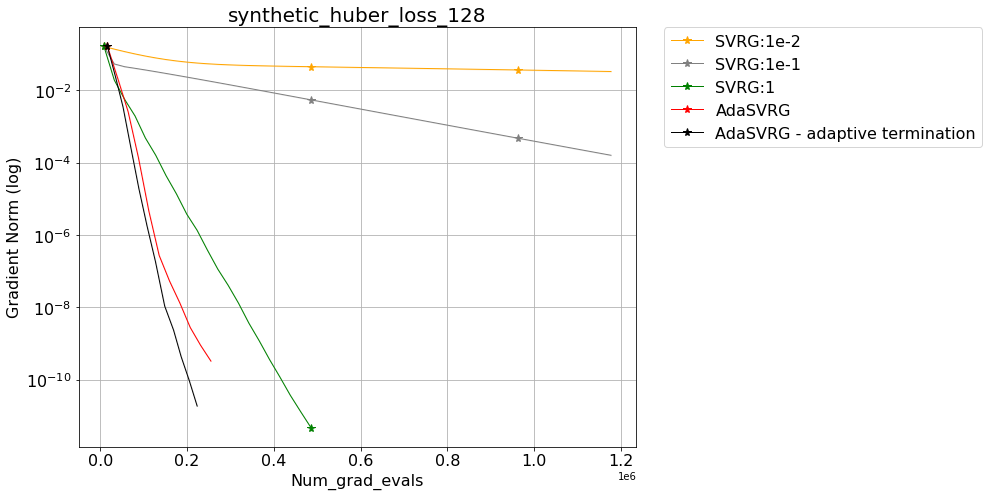

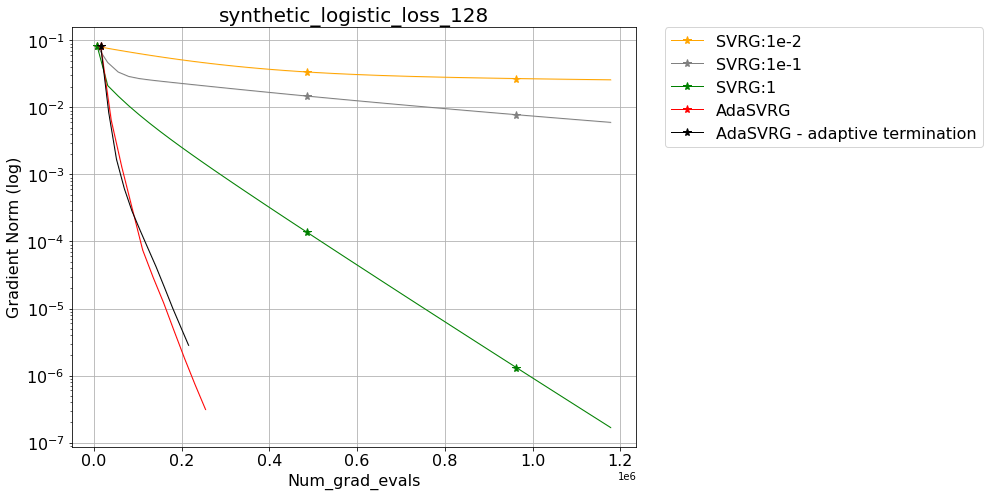

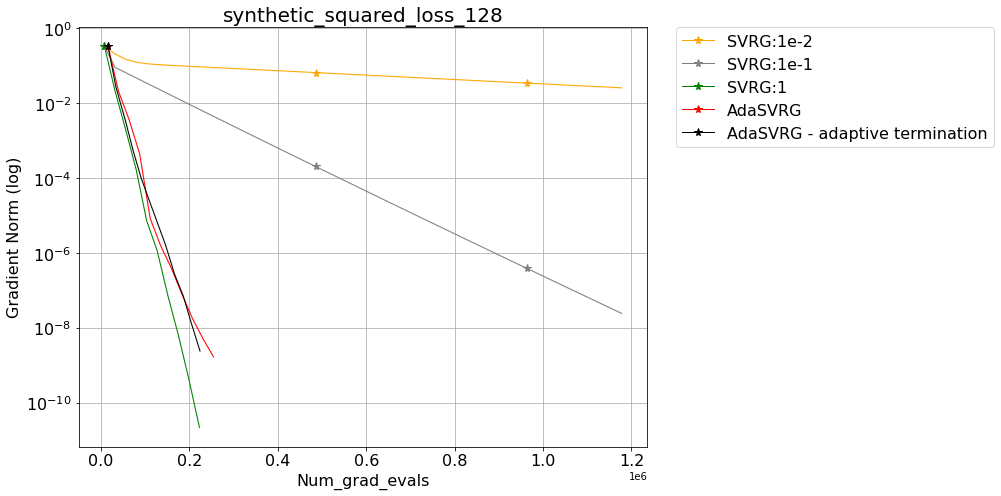

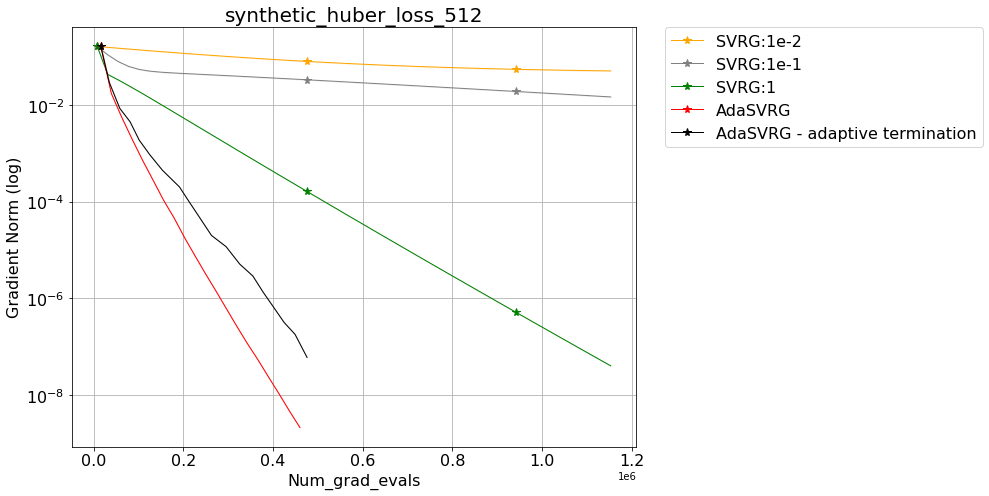

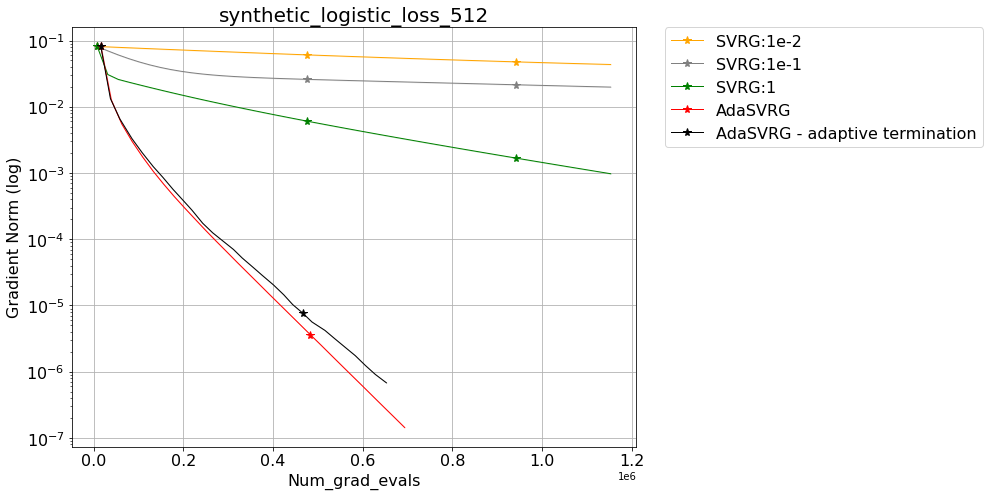

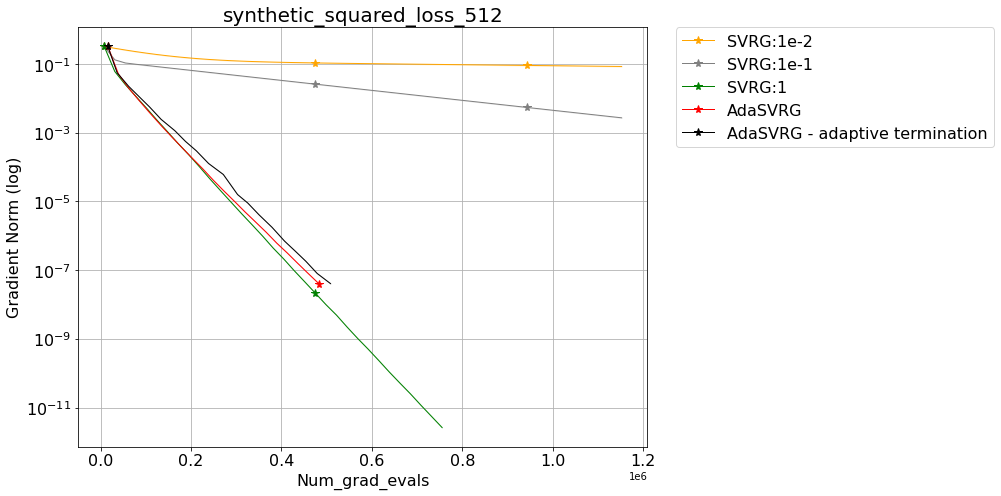

In [5]:
savedir_base = "./results_synthetic_main"
exp_config_fname = './exp_configs.py'
exp_list = []
batch_size = 1

for exp_group in [
    "exp_synthetic",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
      # {'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )


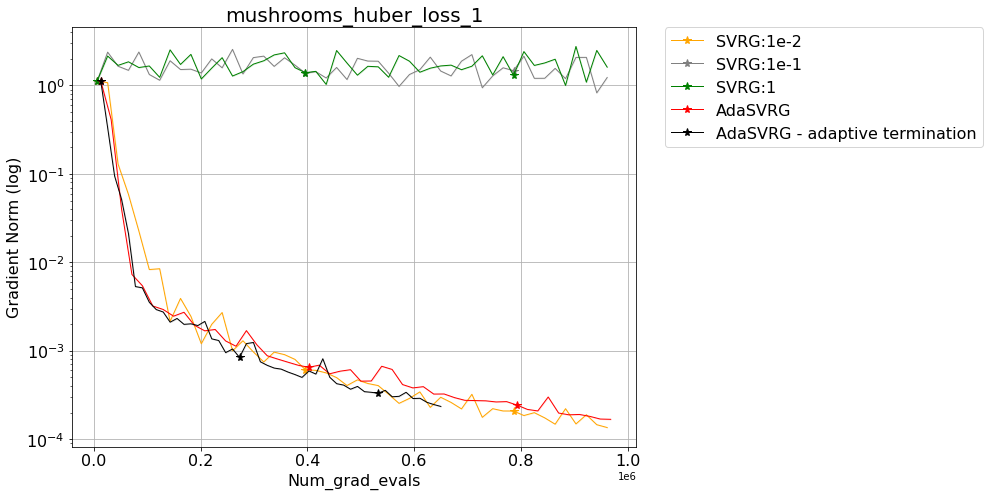

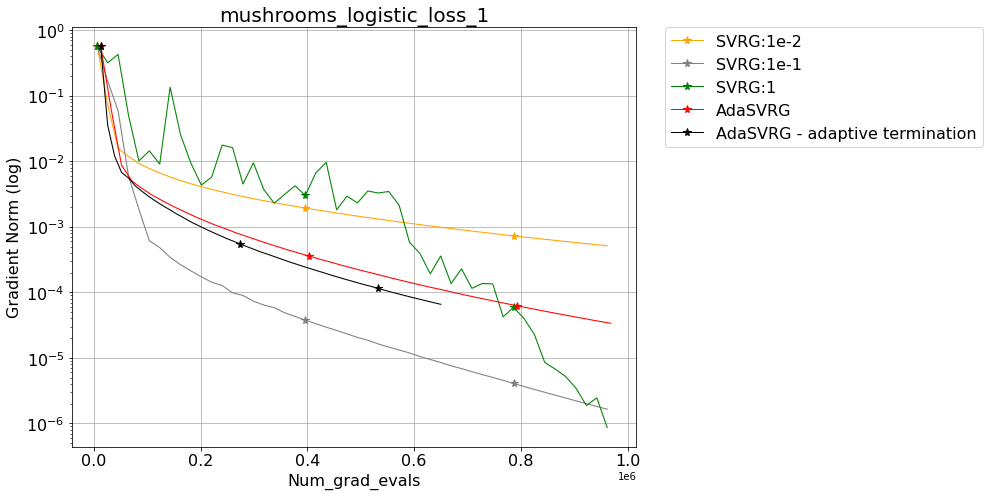

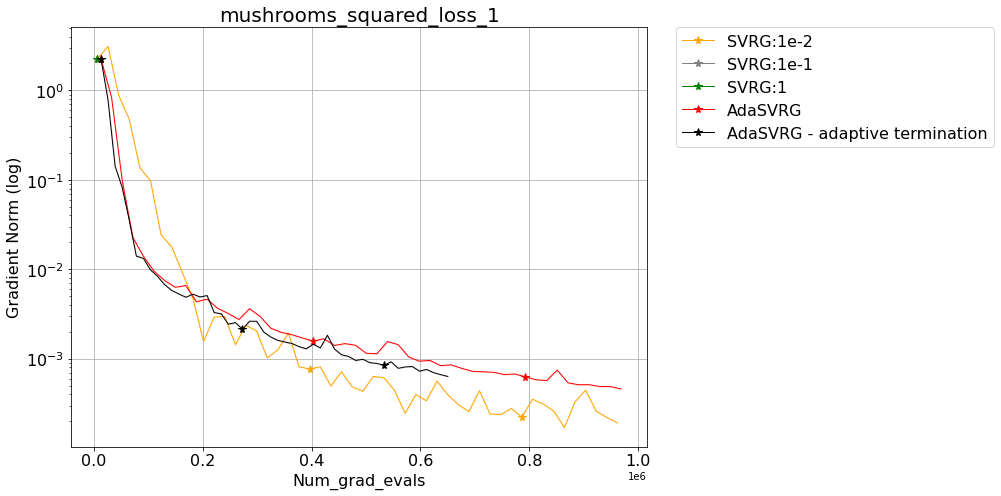

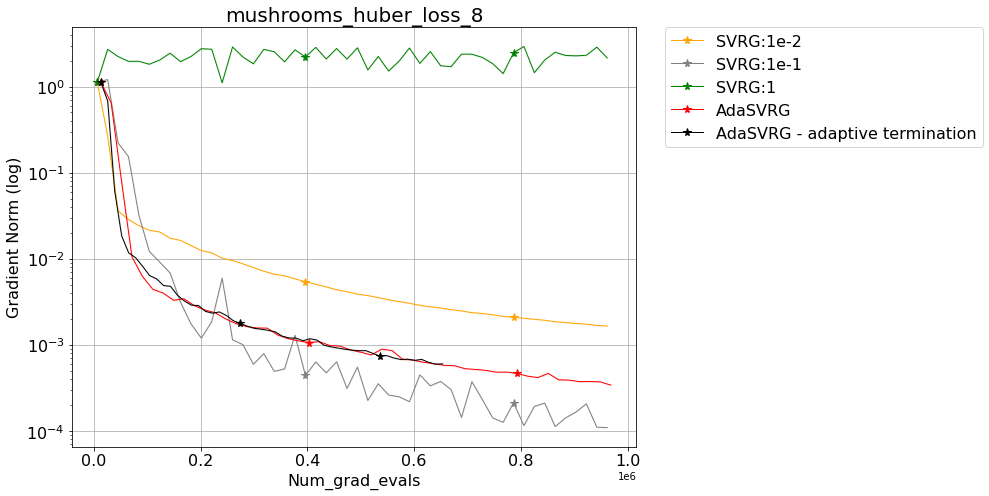

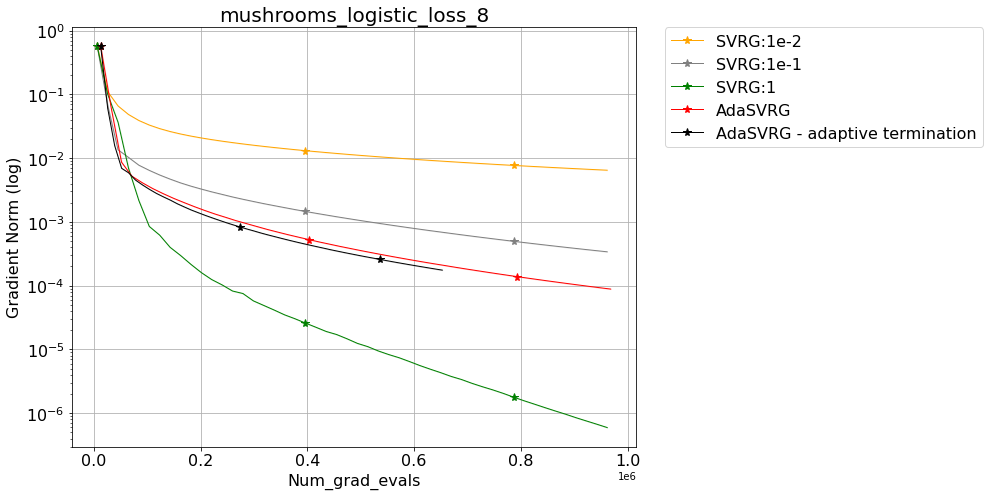

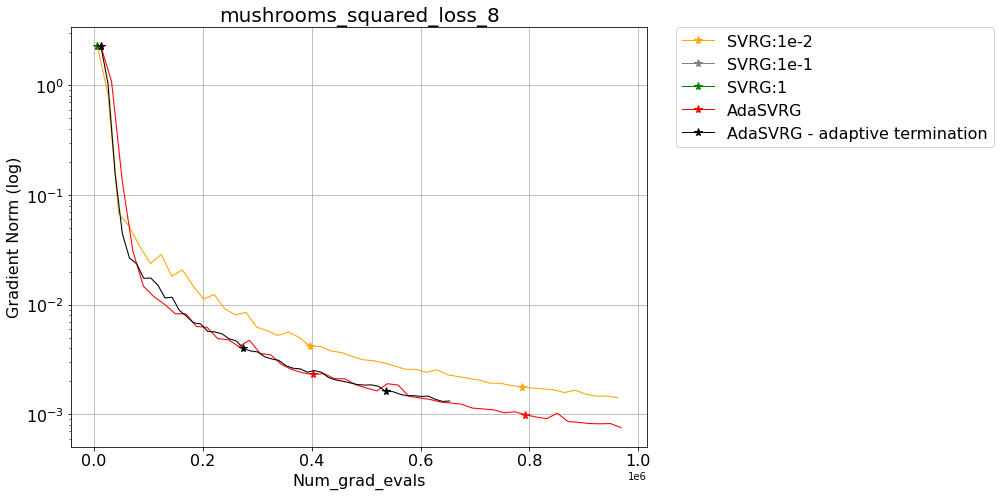

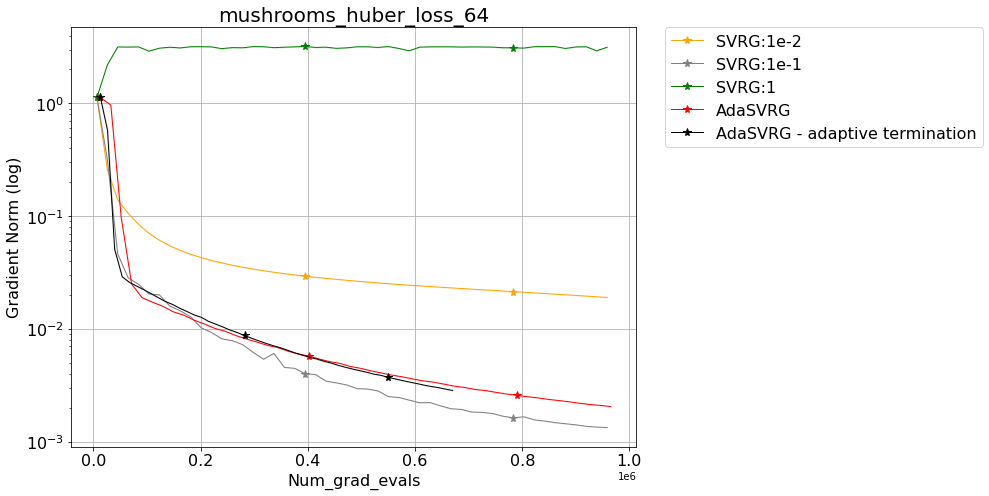

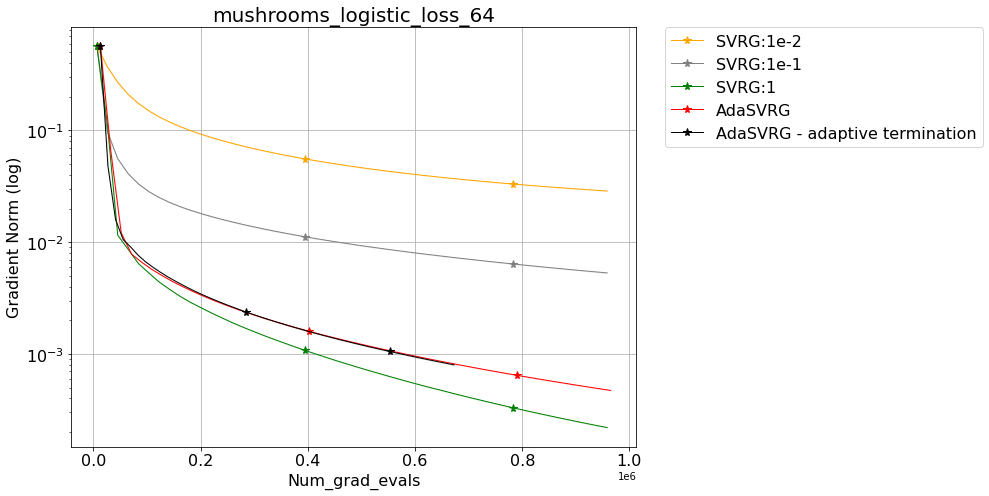

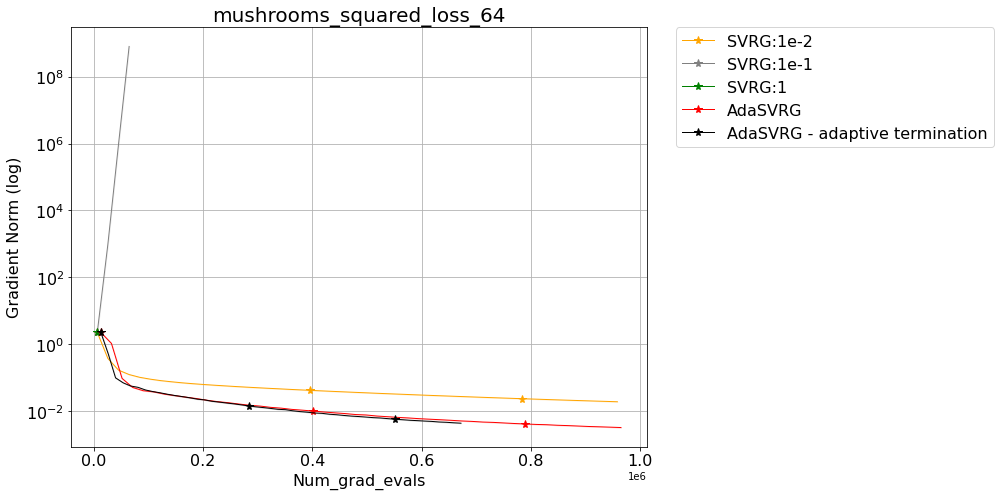

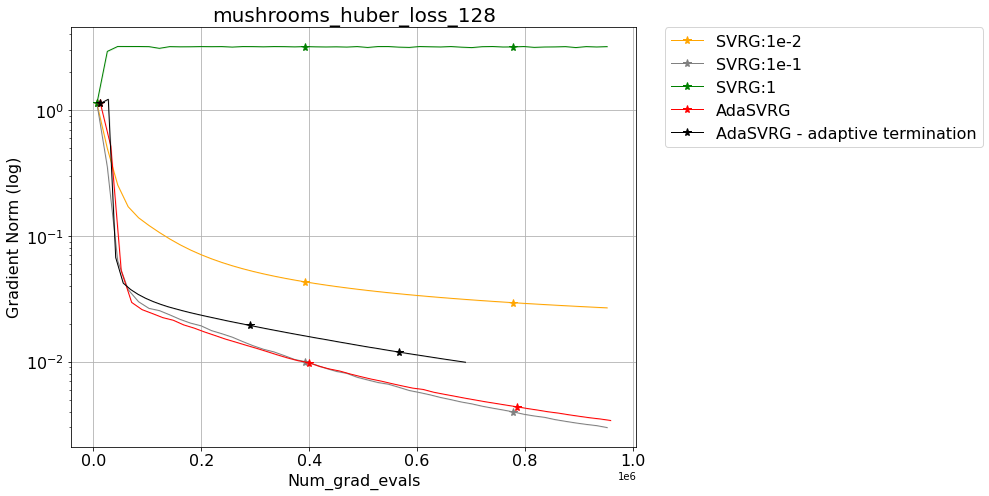

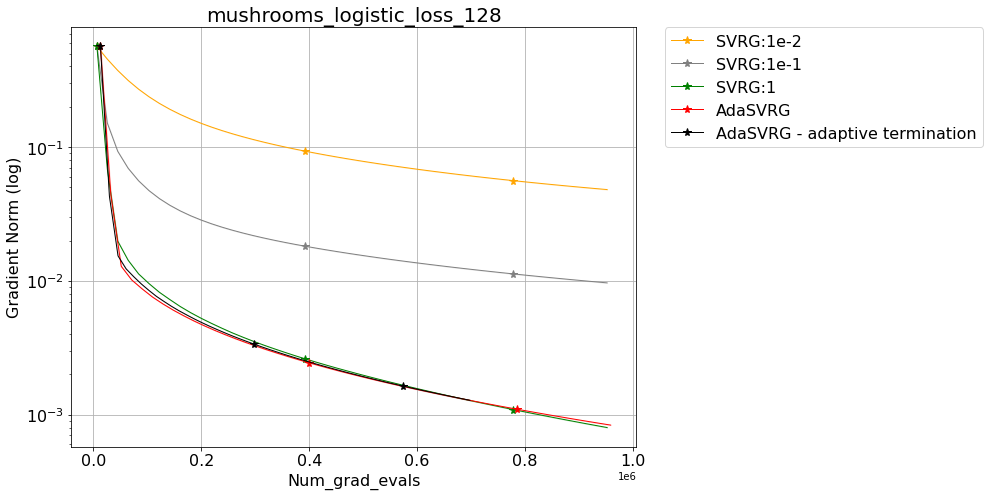

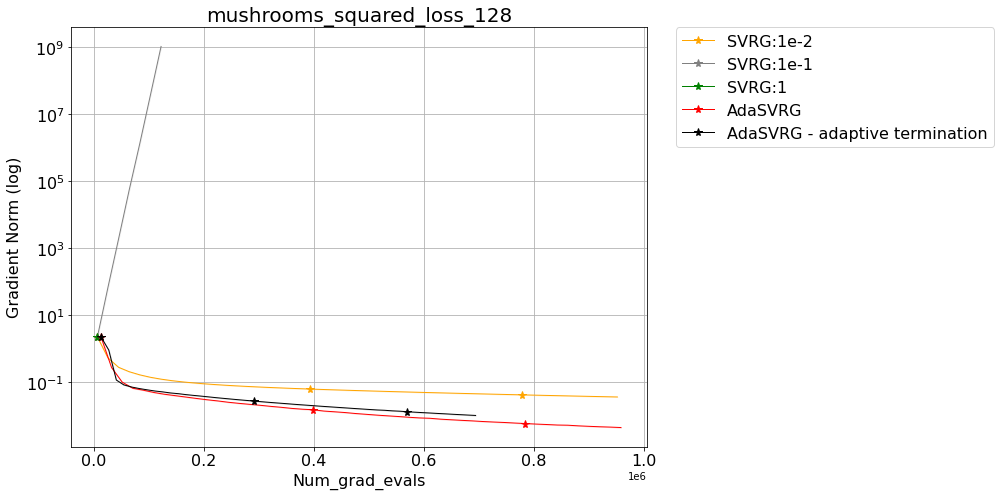

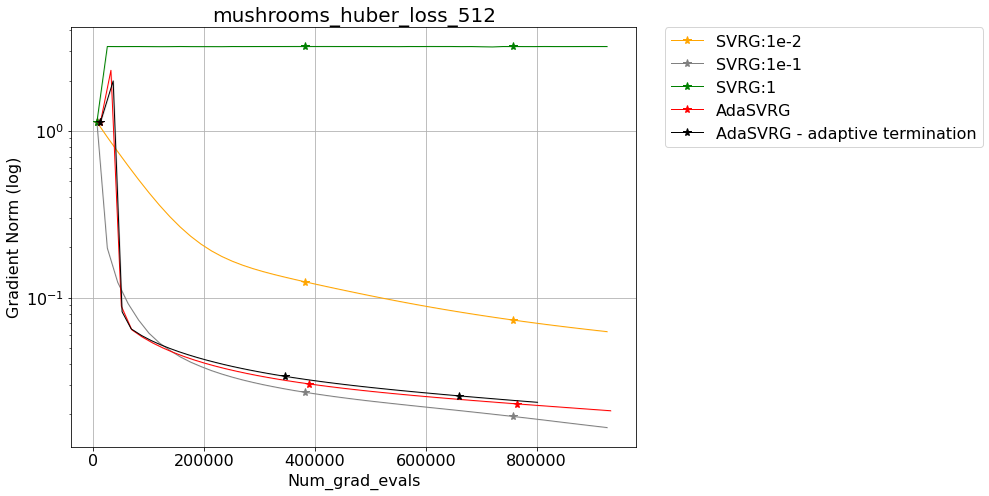

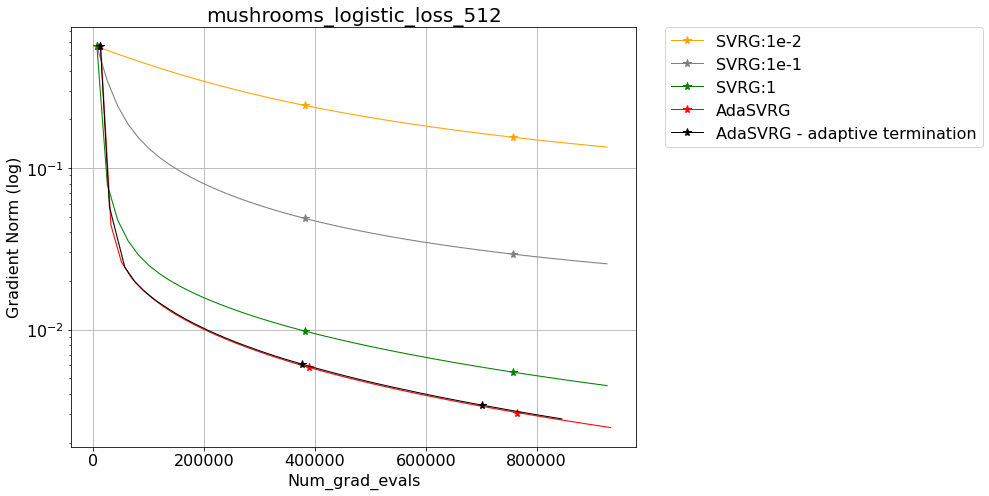

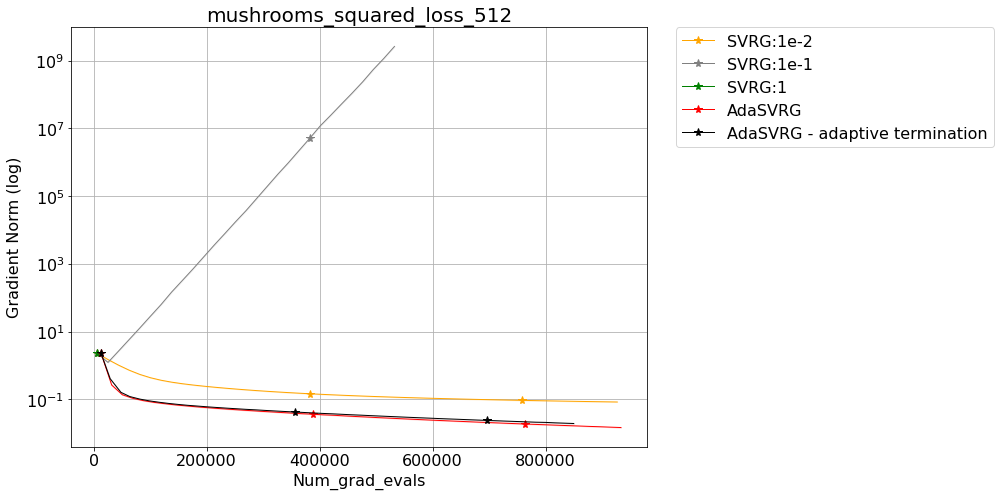

In [6]:
savedir_base = "./results_mushrooms_main"
exp_config_fname = './exp_configs.py'
exp_list = []
batch_size = 1

for exp_group in [
    "exp_mushrooms",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
       #{'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )


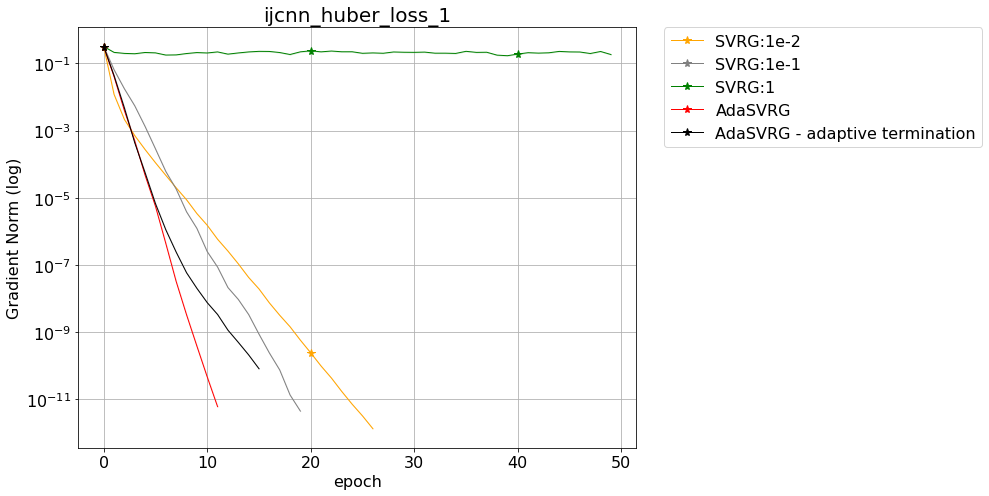

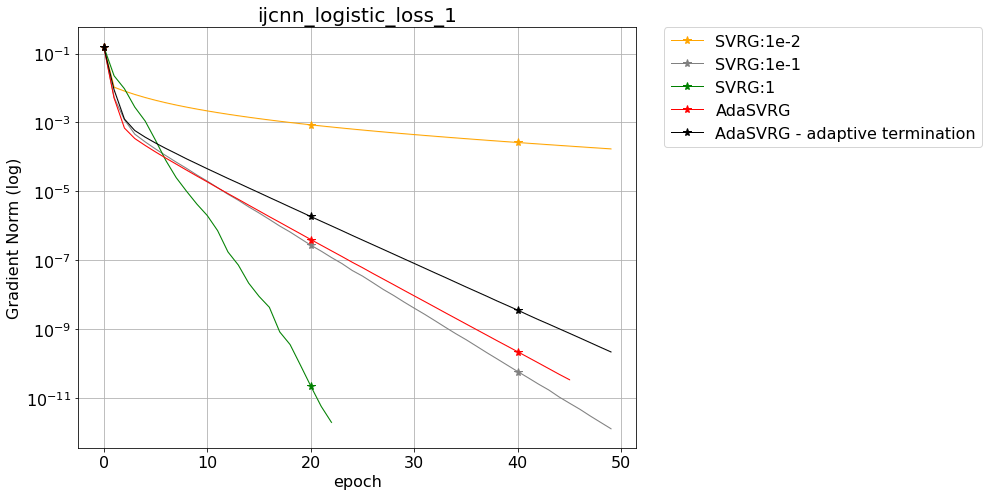

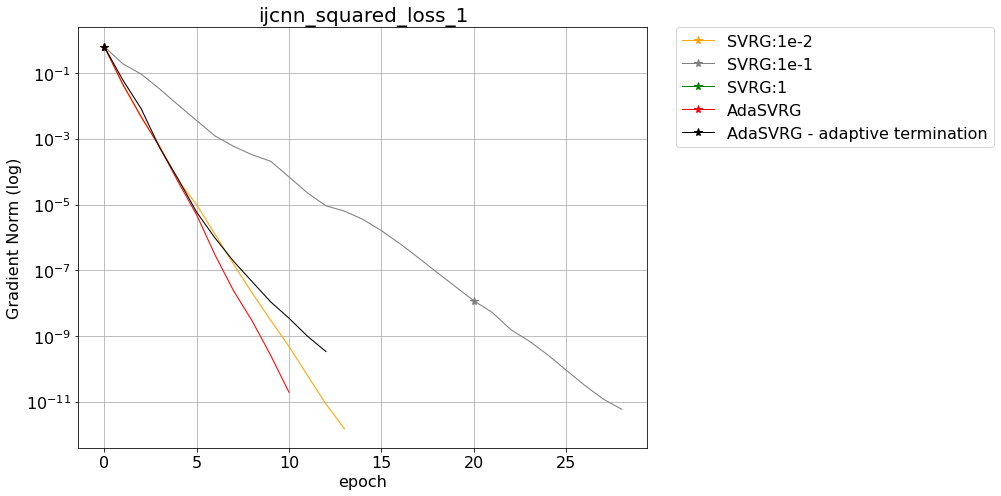

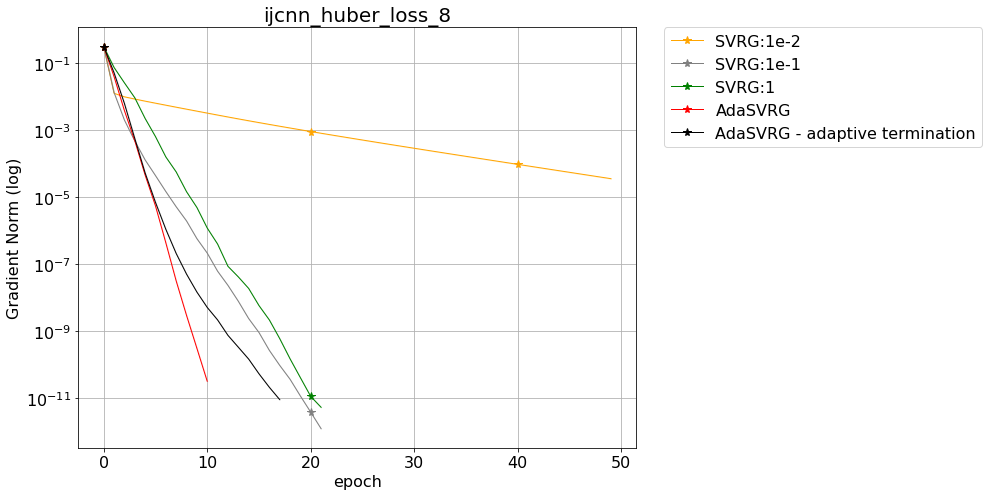

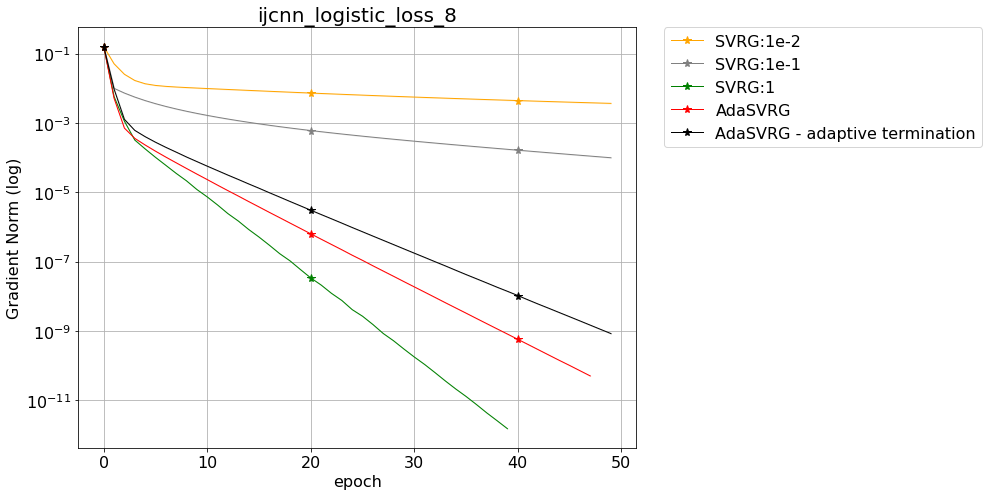

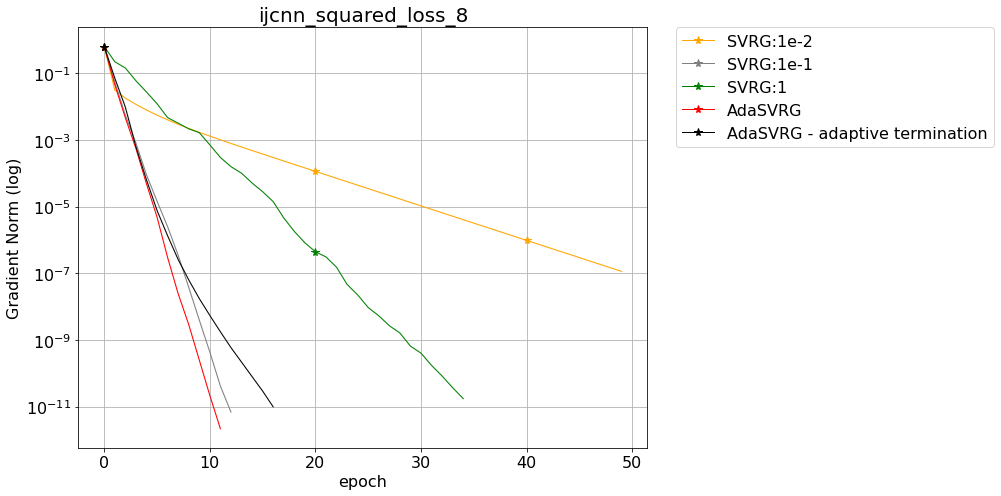

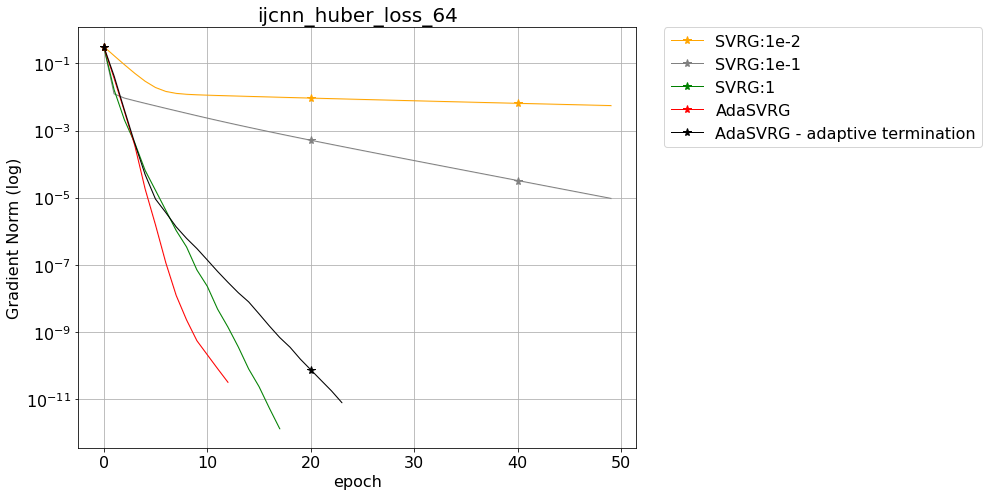

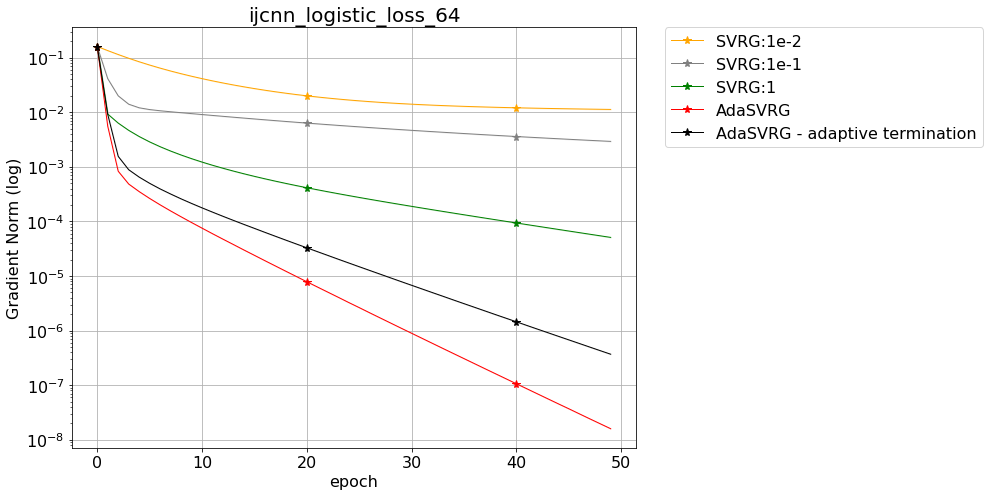

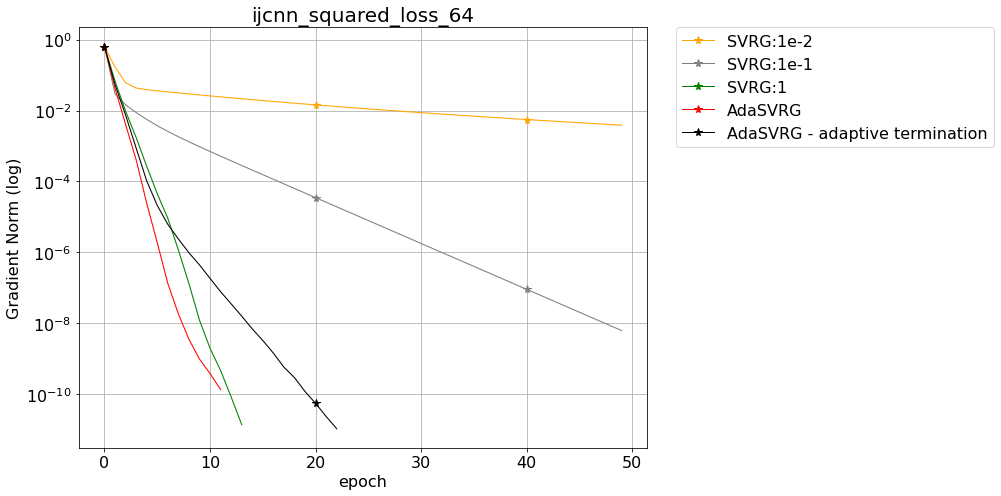

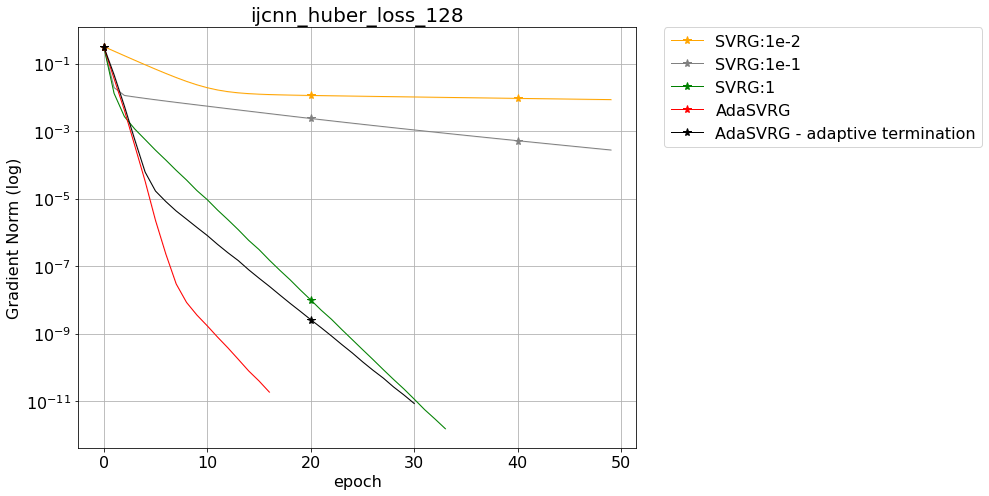

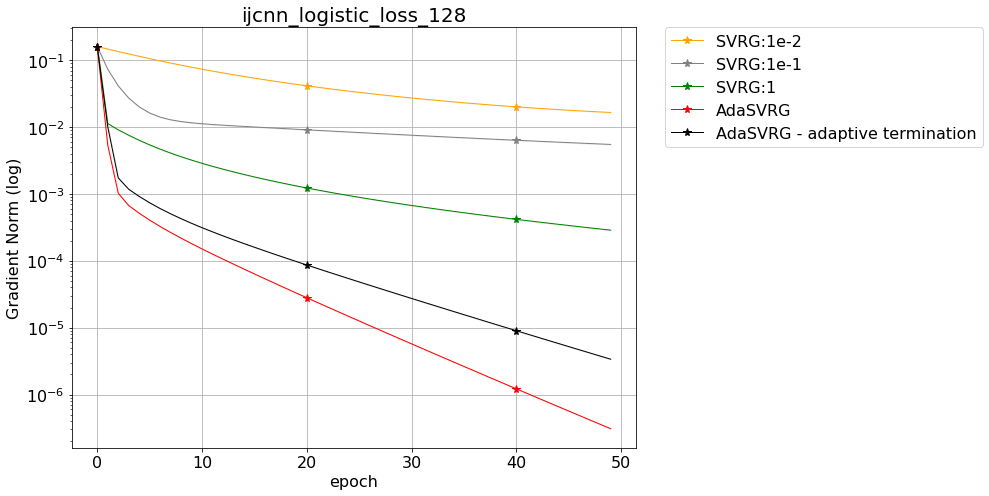

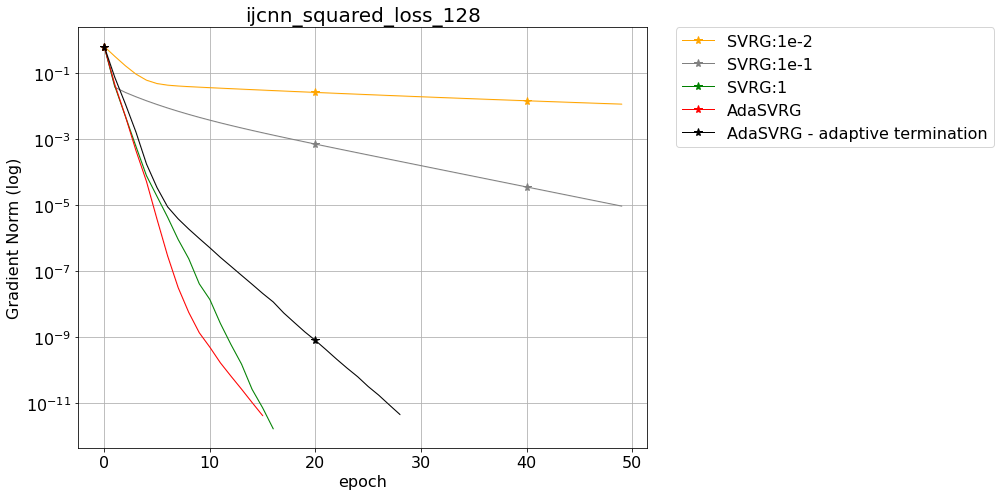

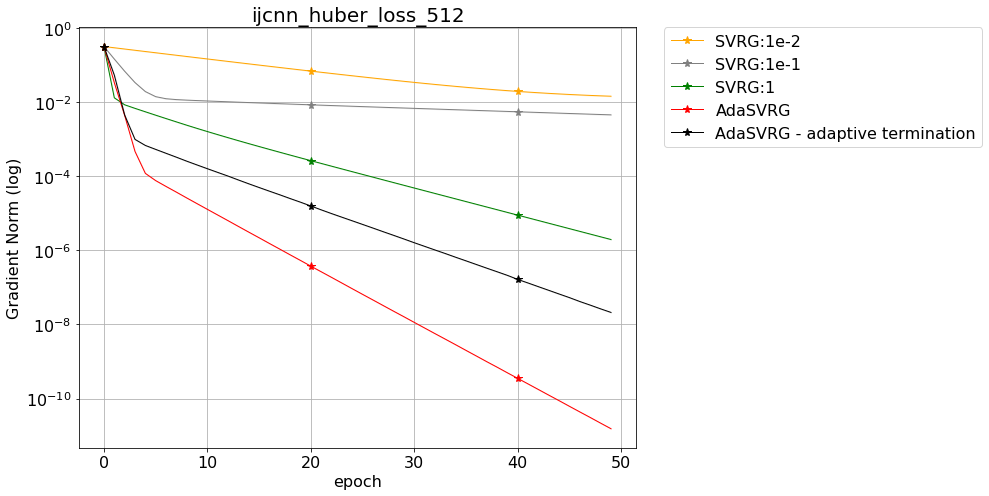

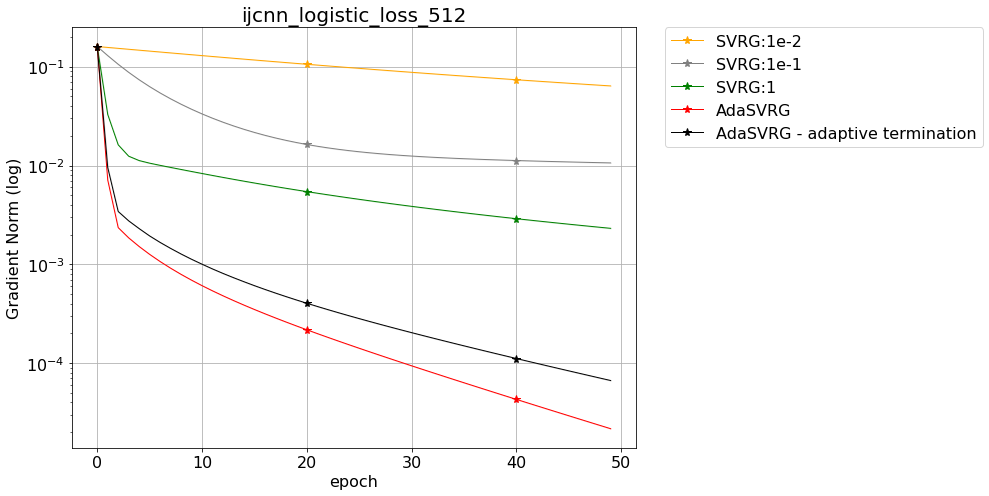

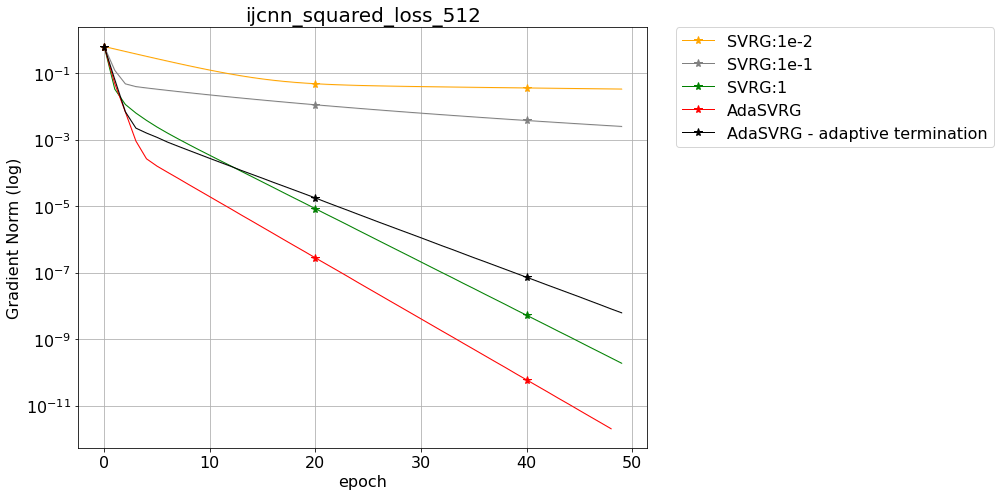

In [7]:
savedir_base = "./results_ijcnn_main"
exp_config_fname = './exp_configs.py'
exp_list = []

for exp_group in [
    "exp_ijcnn",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
      # {'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='epoch',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )


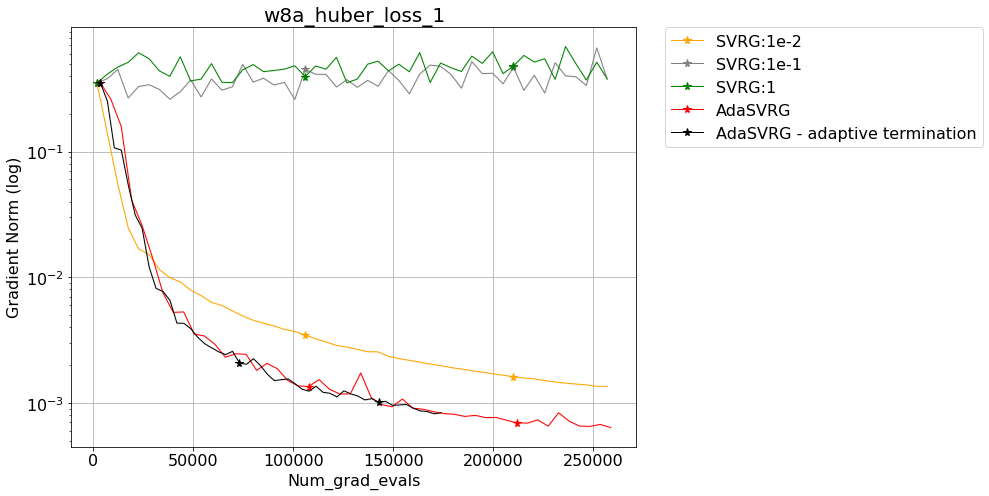

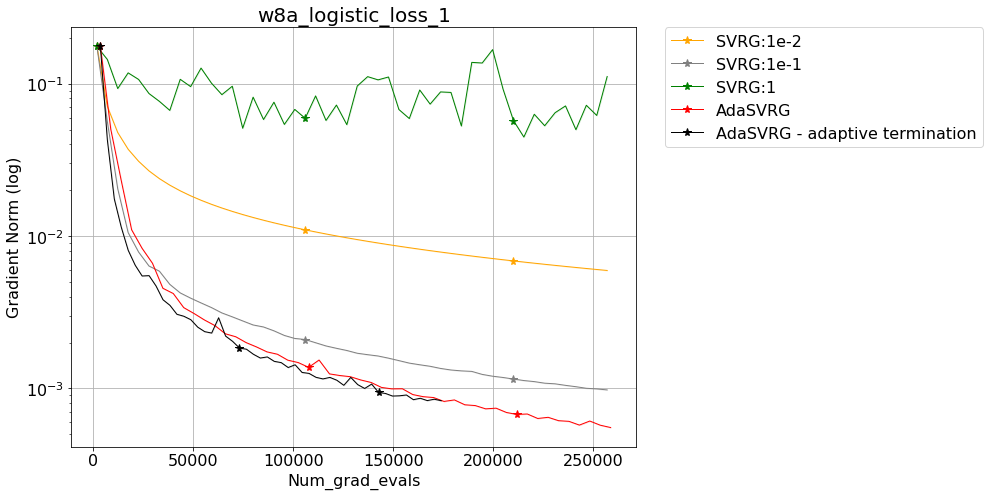

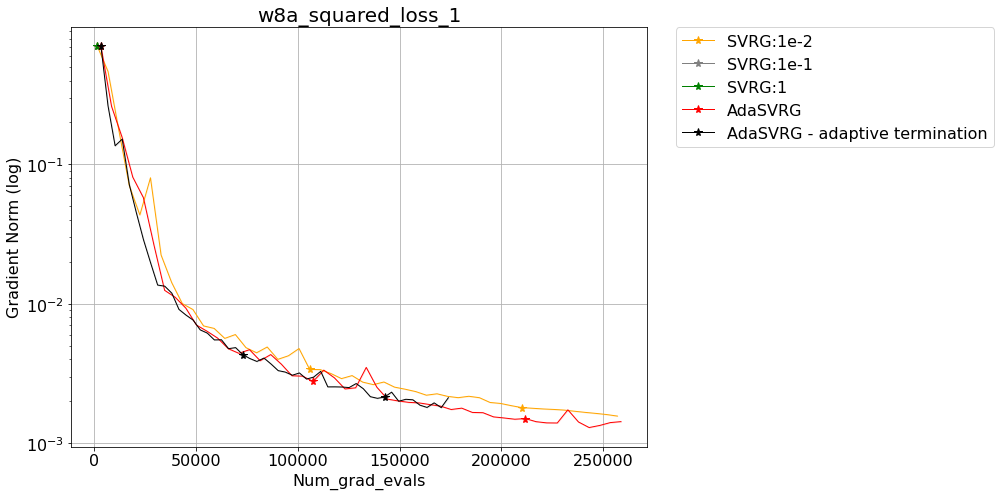

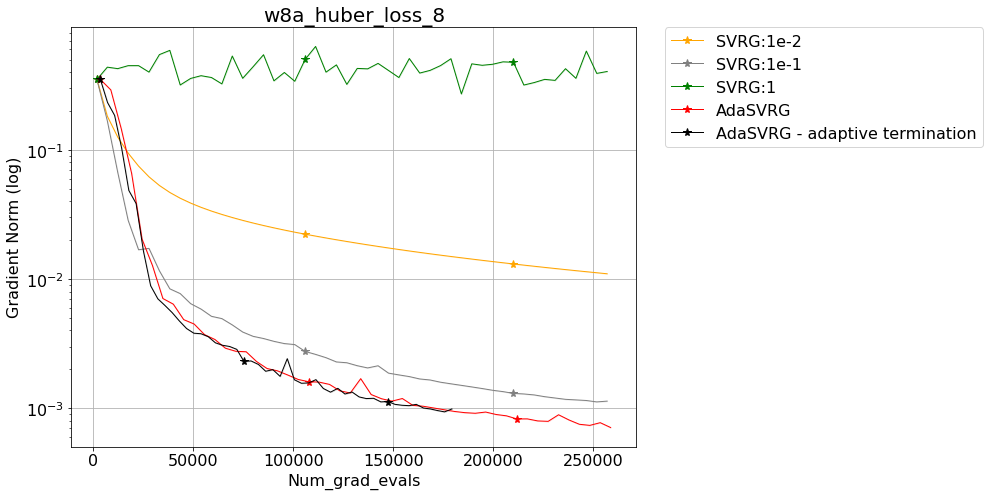

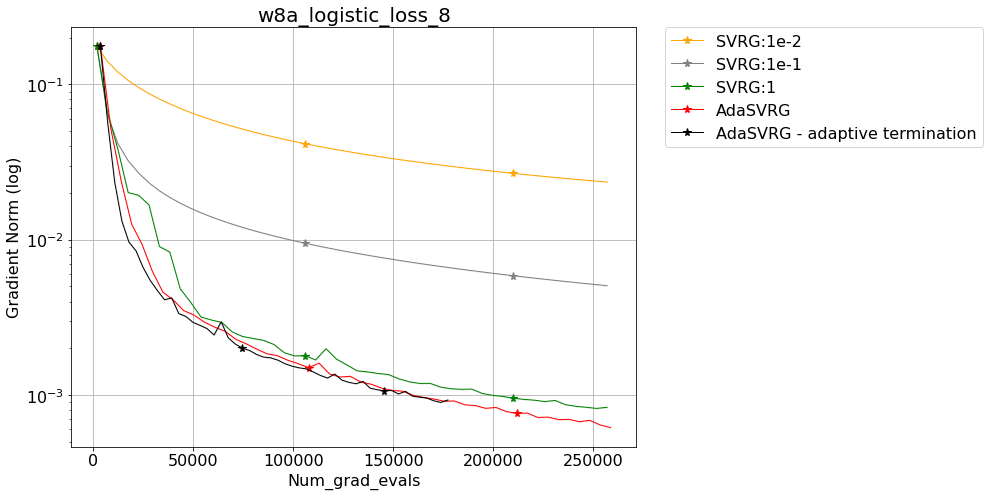

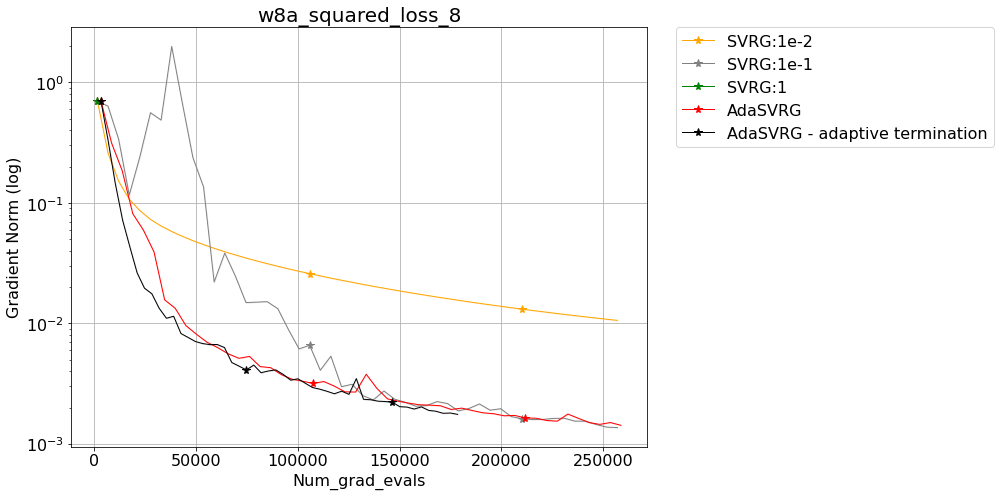

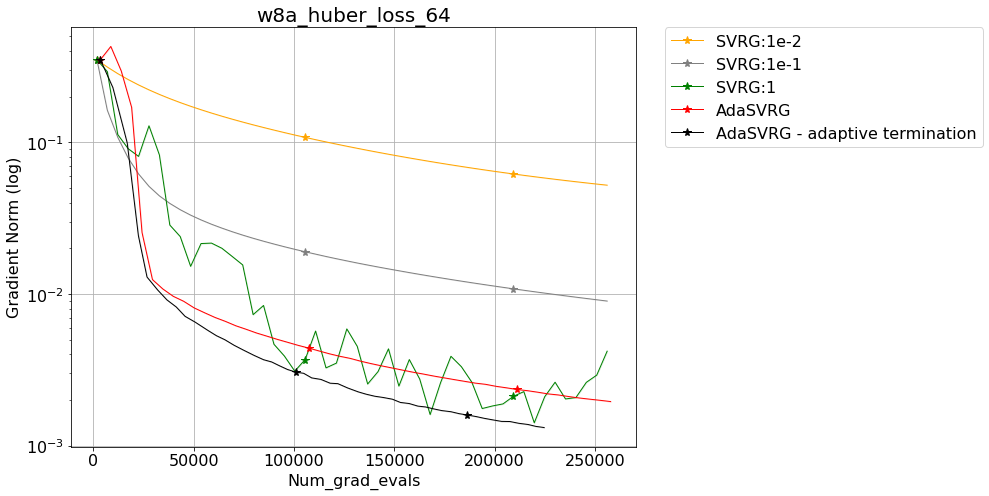

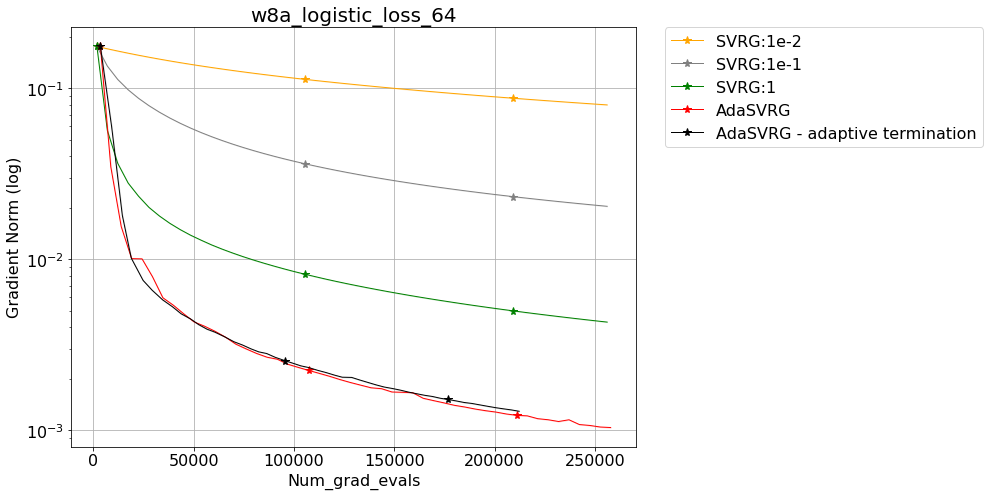

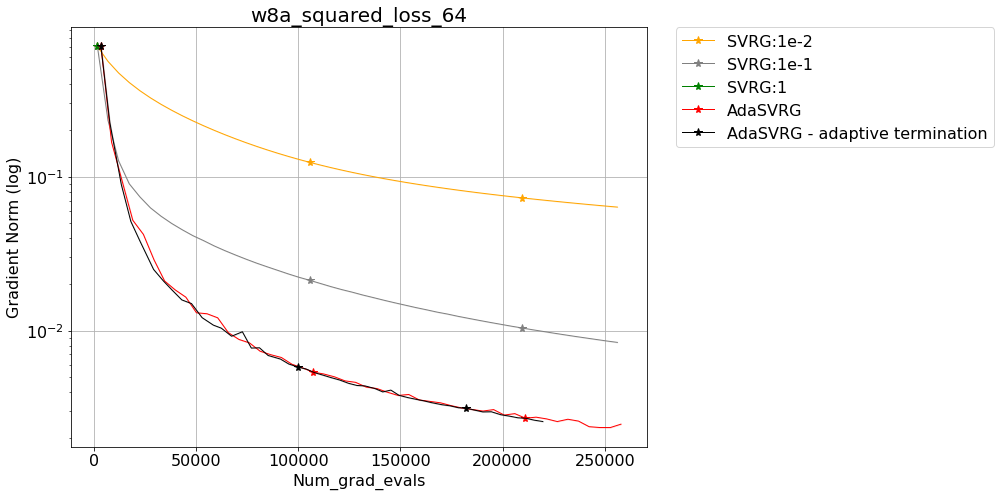

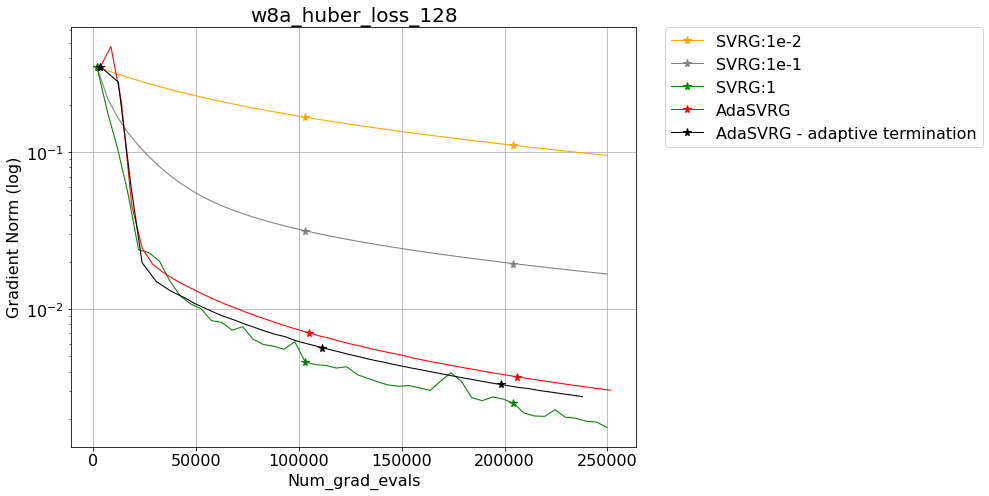

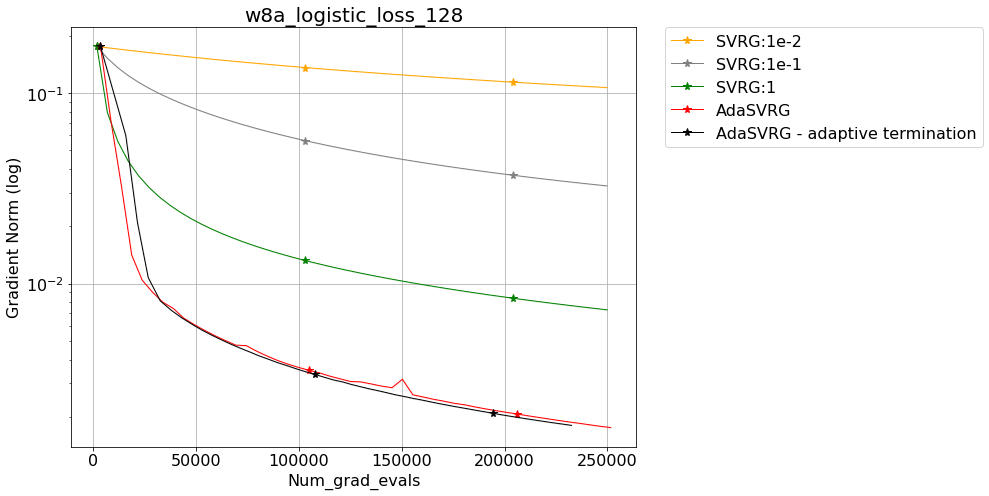

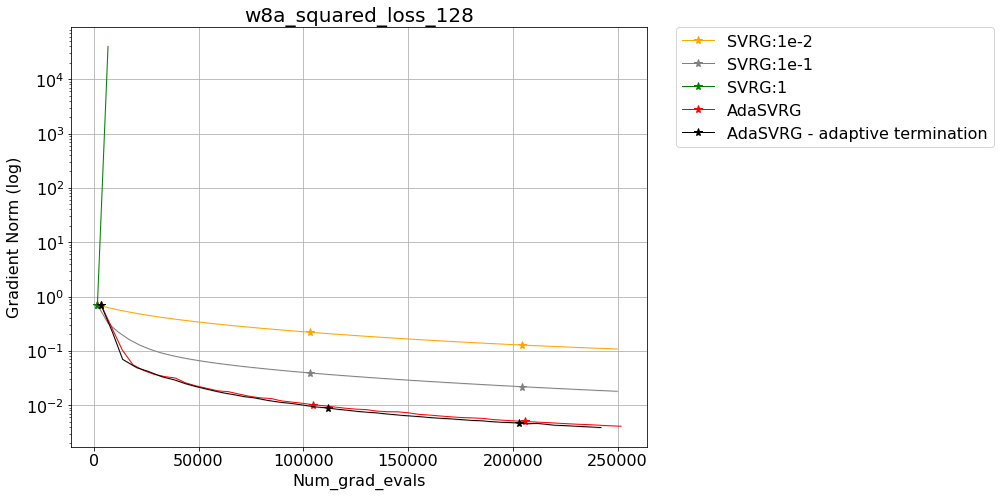

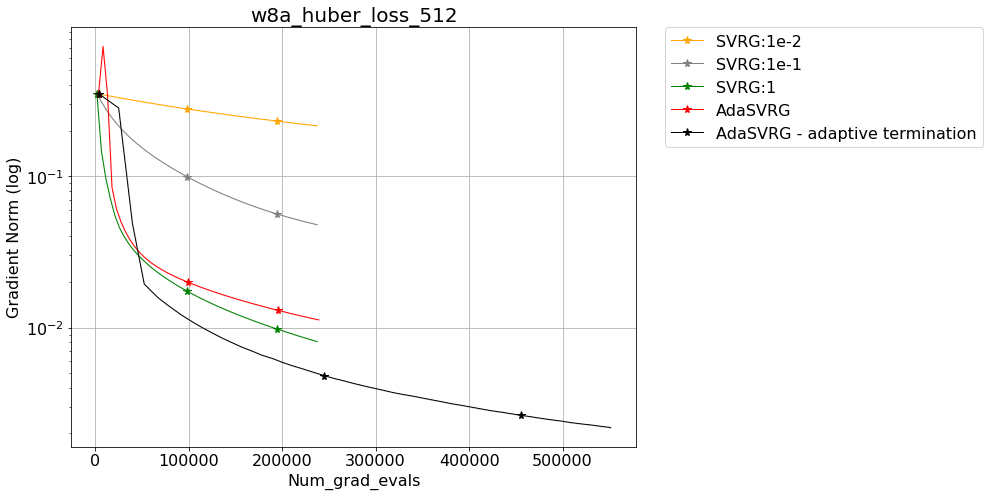

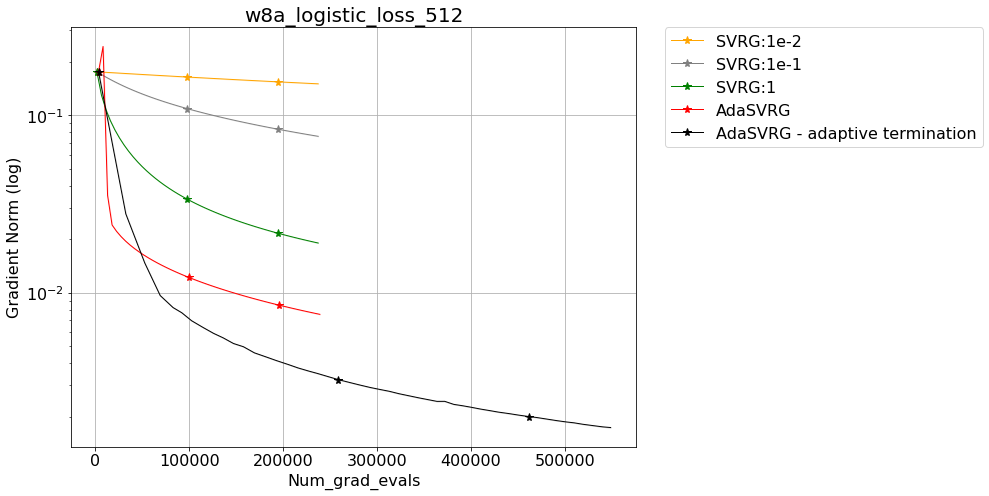

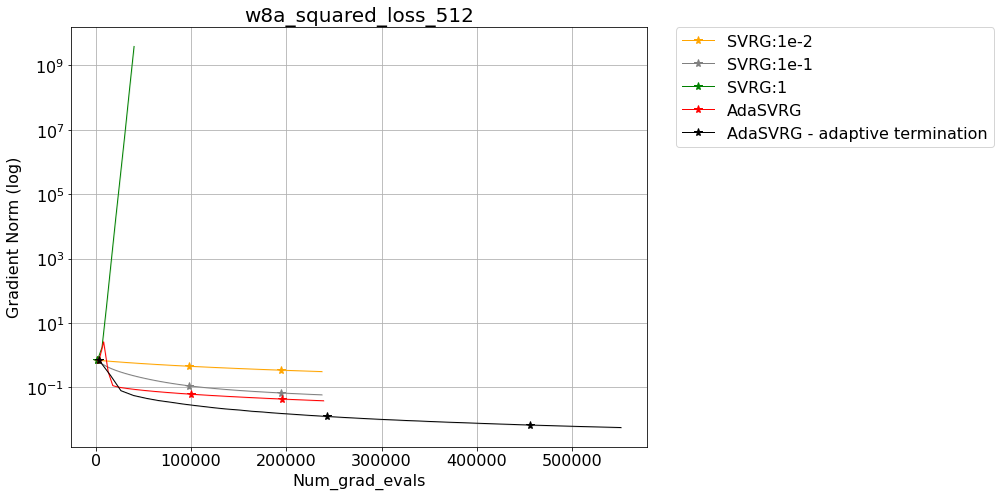

In [8]:
savedir_base = "./results_w8a_main"
exp_config_fname = './exp_configs.py'
exp_list = []

for exp_group in [
    "exp_w8a",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
      # {'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )


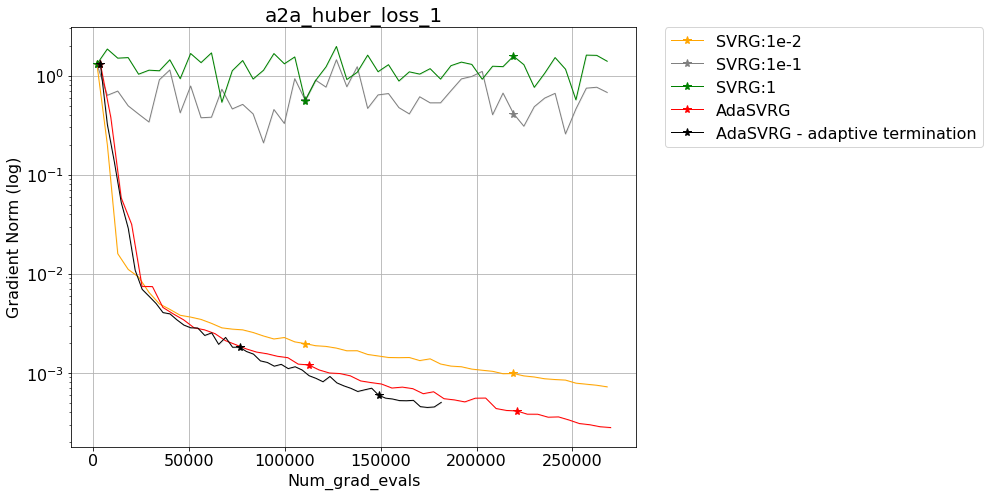

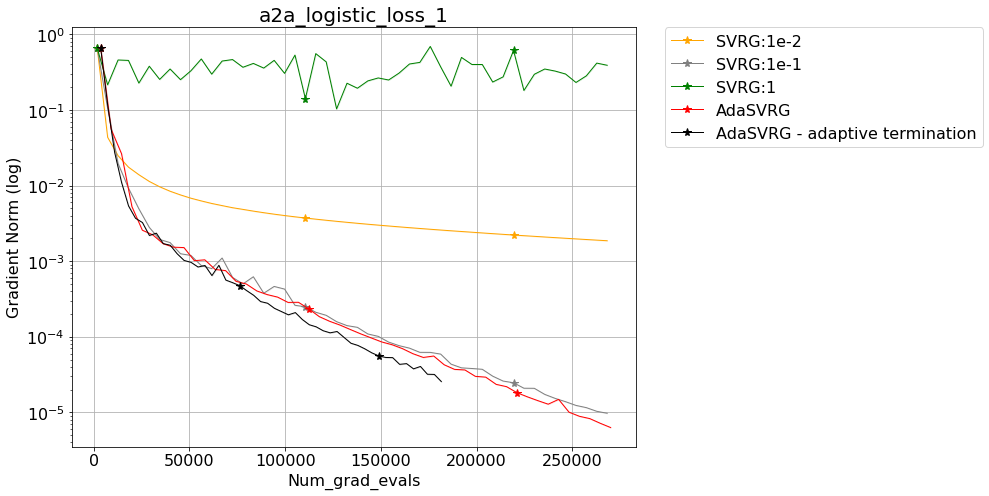

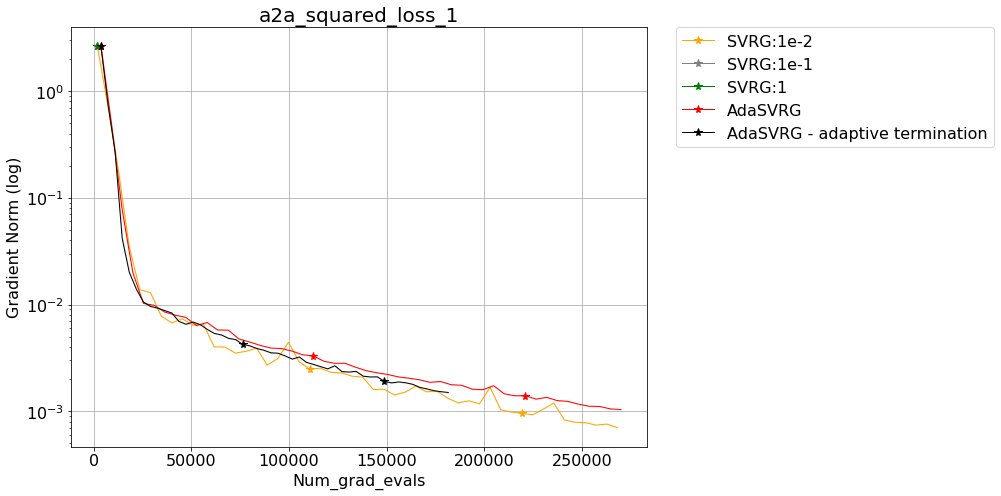

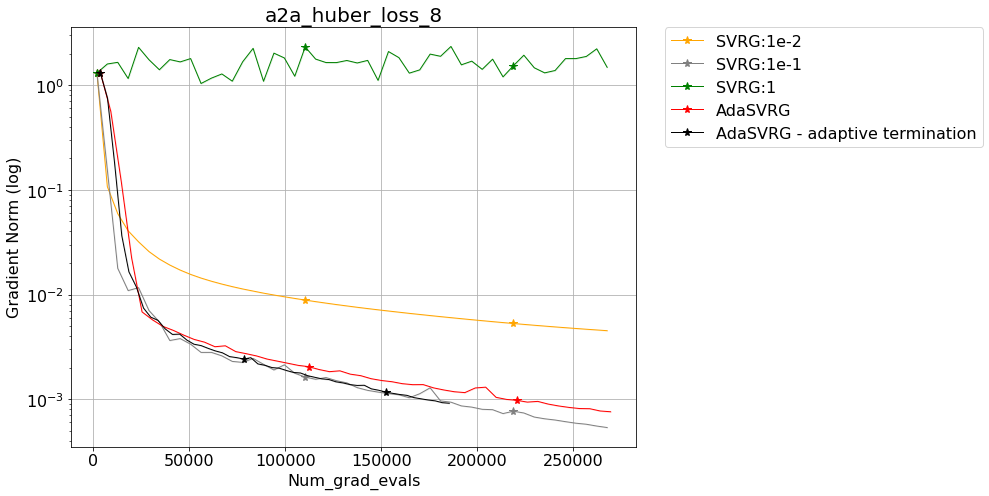

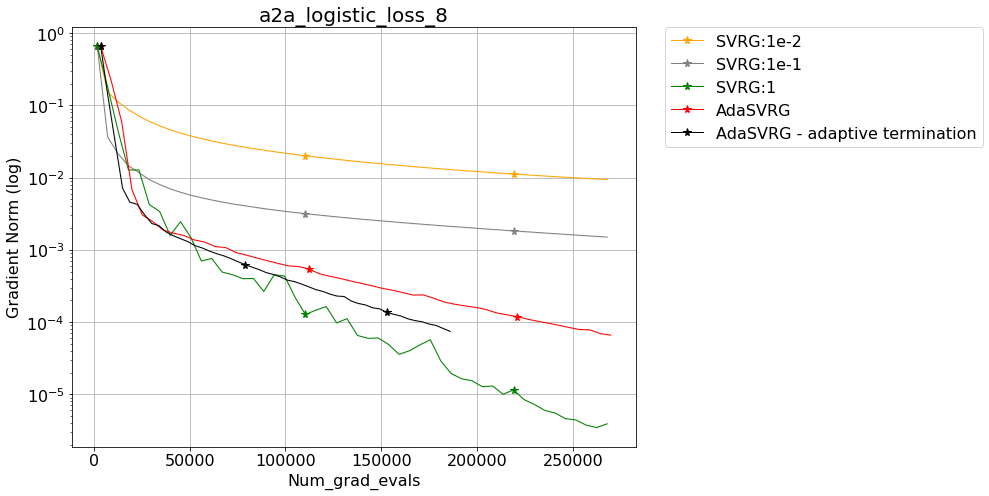

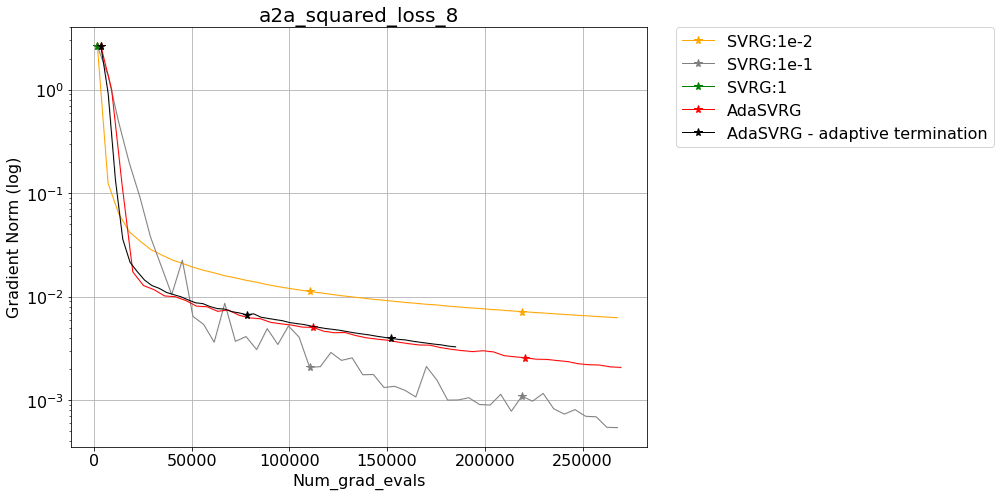

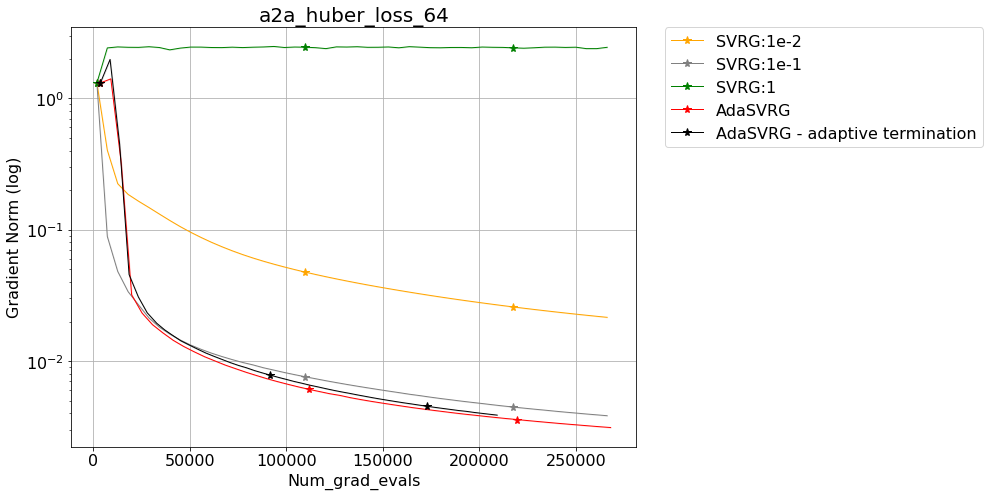

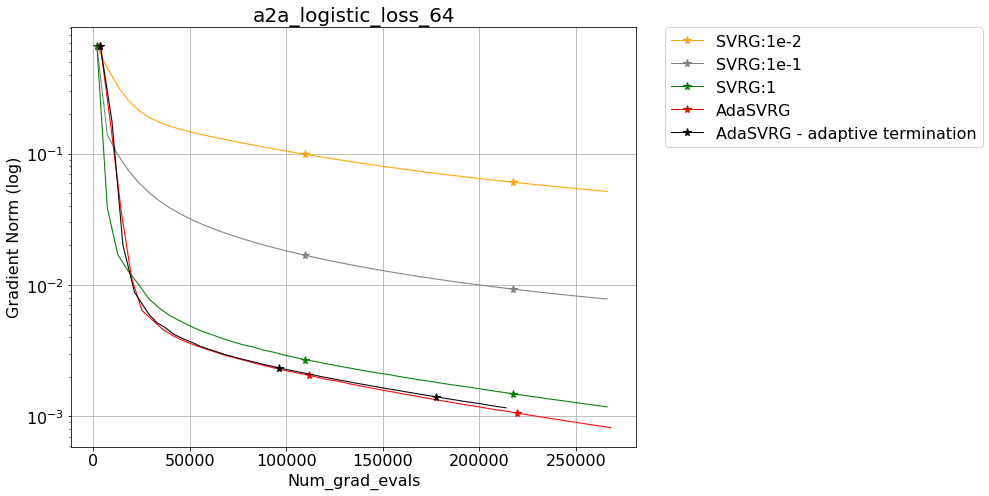

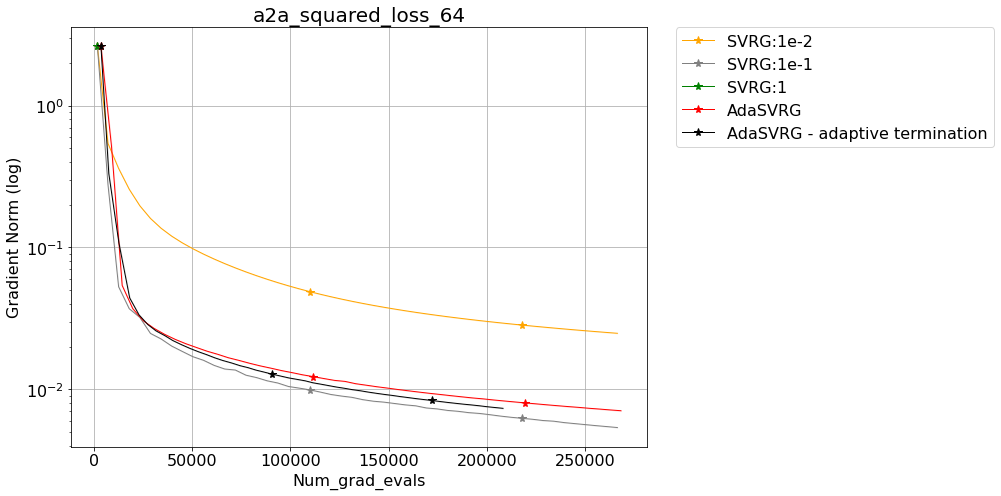

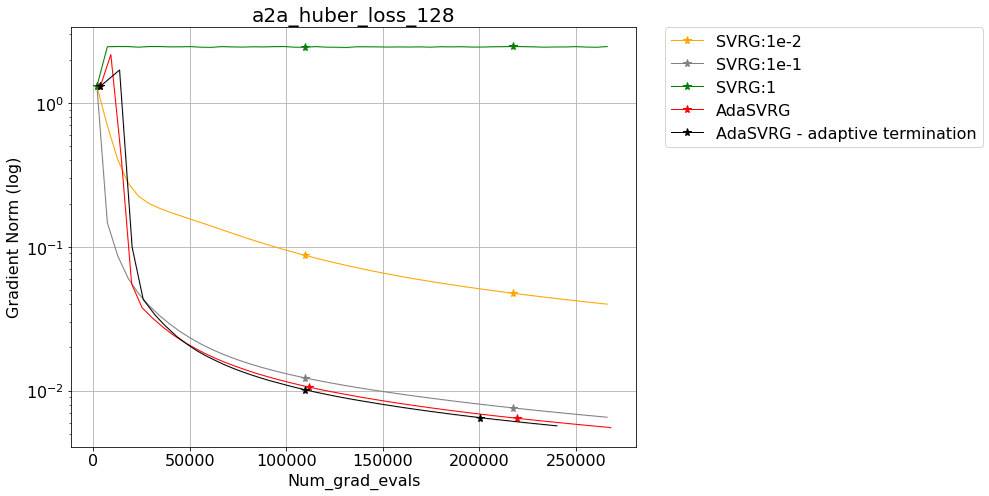

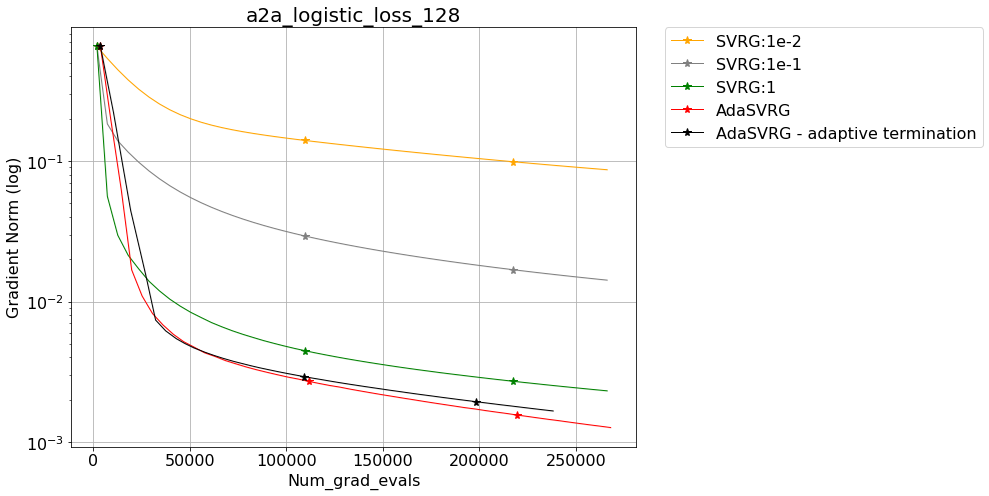

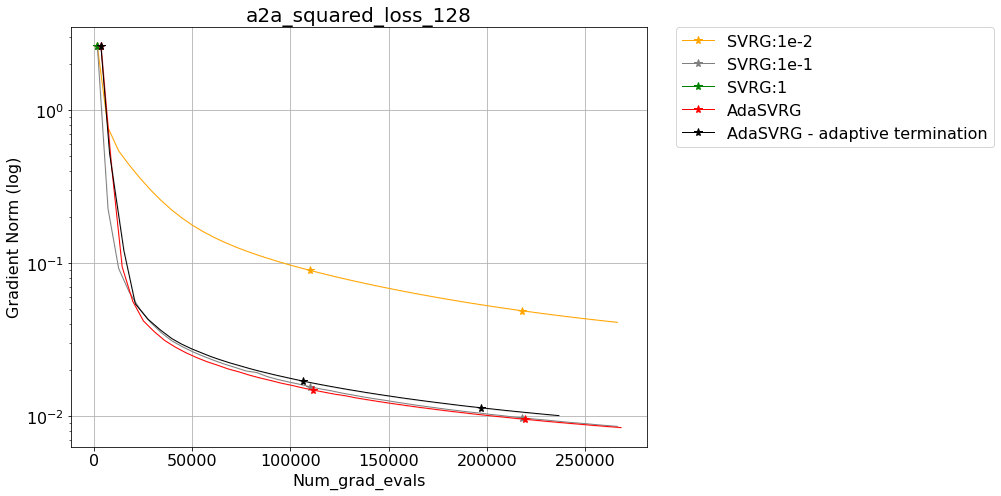

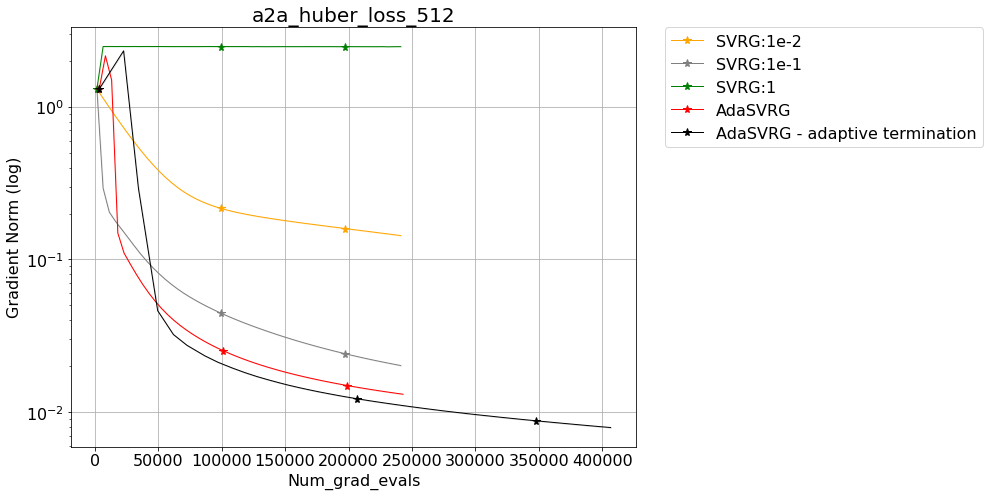

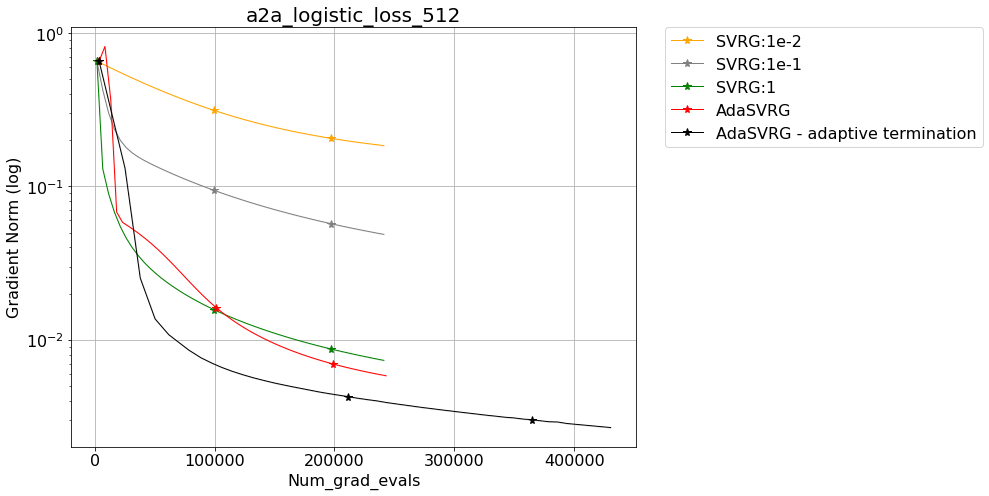

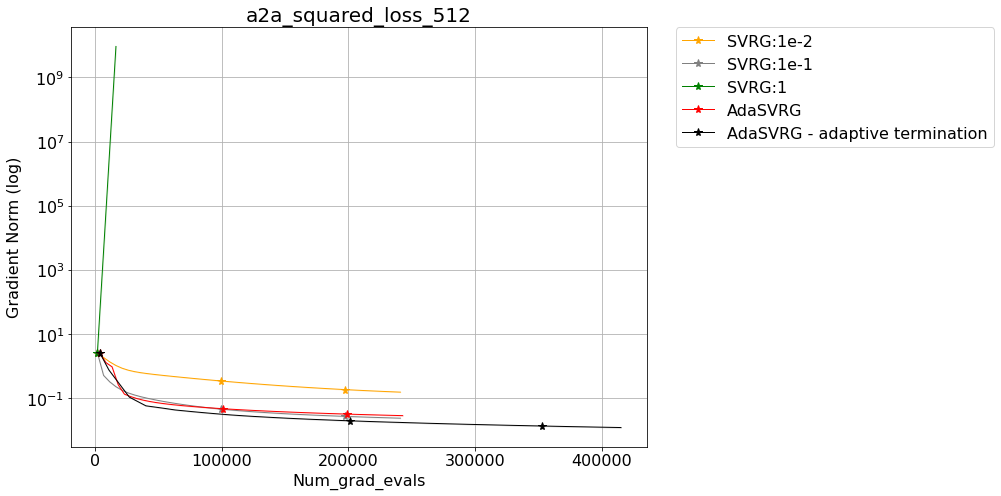

In [9]:
savedir_base = "./results_a2a_main"
exp_config_fname = './exp_configs.py'
exp_list = []

for exp_group in [
    "exp_a2a",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]



# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
      # {'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )


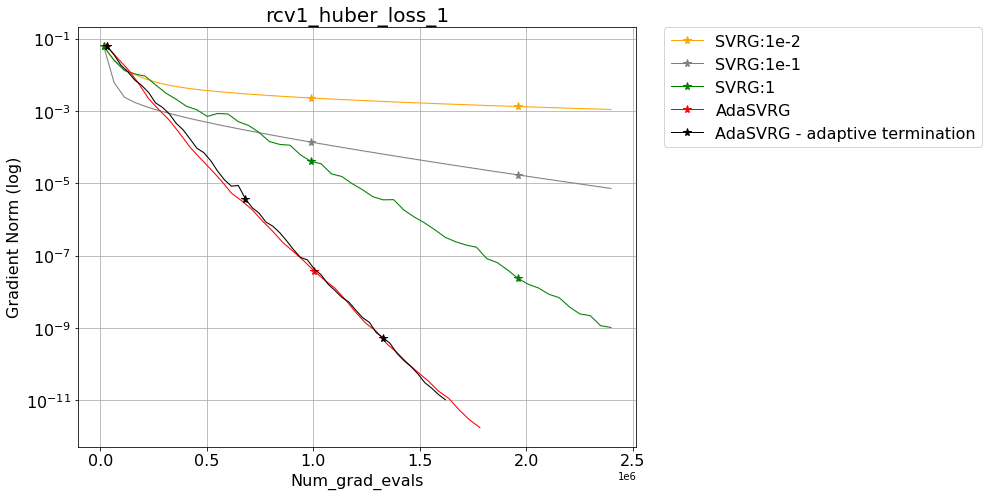

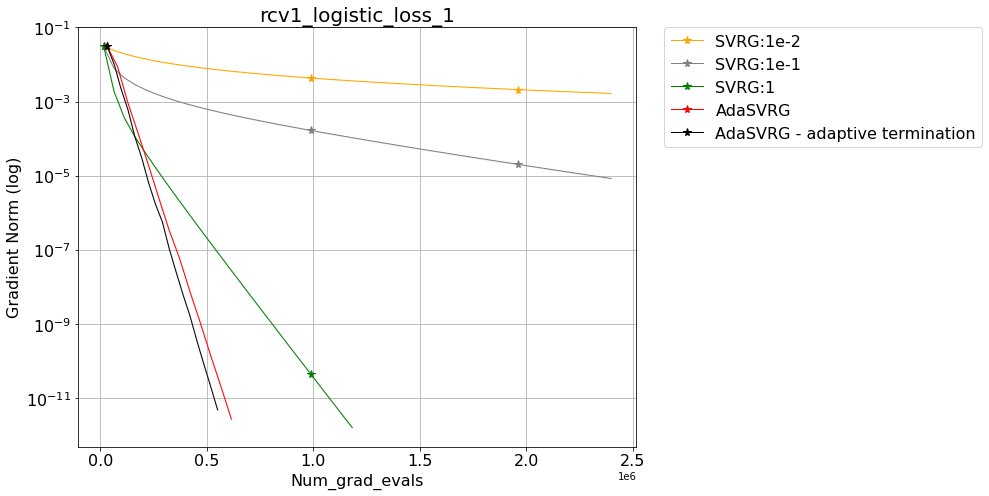

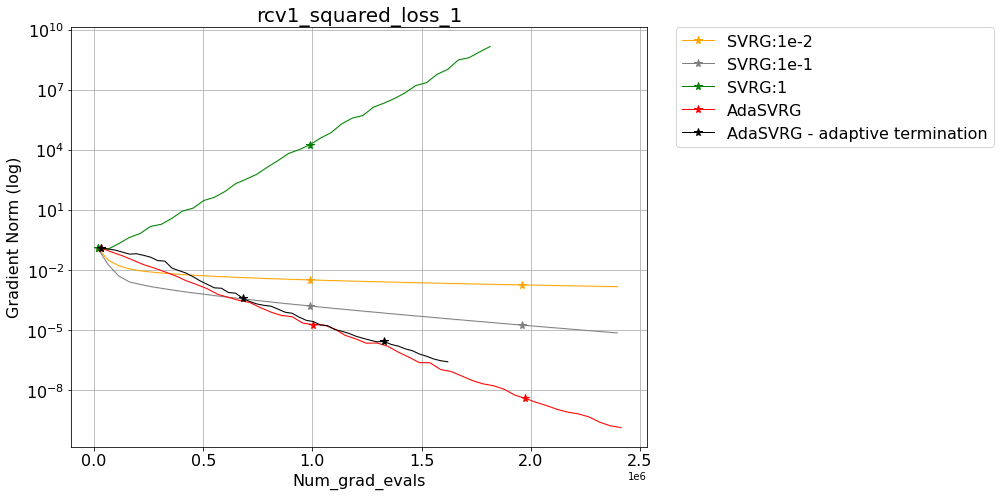

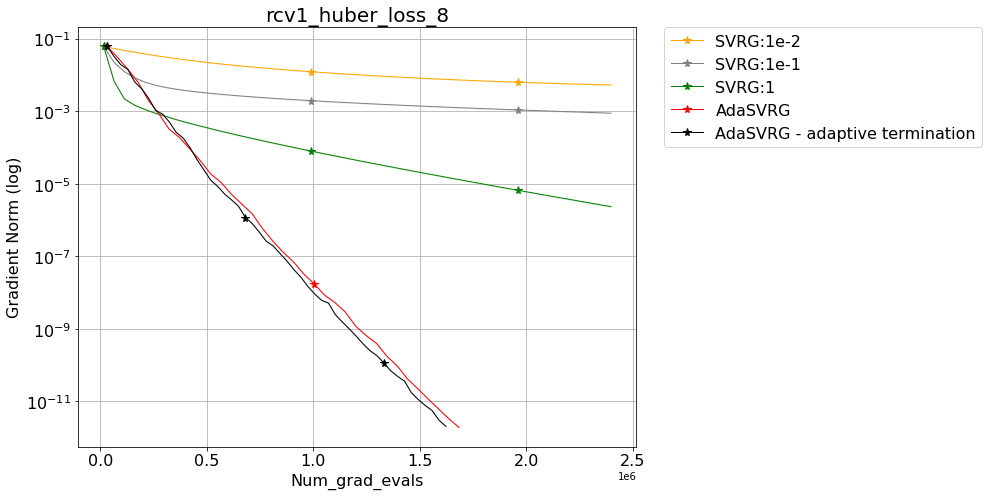

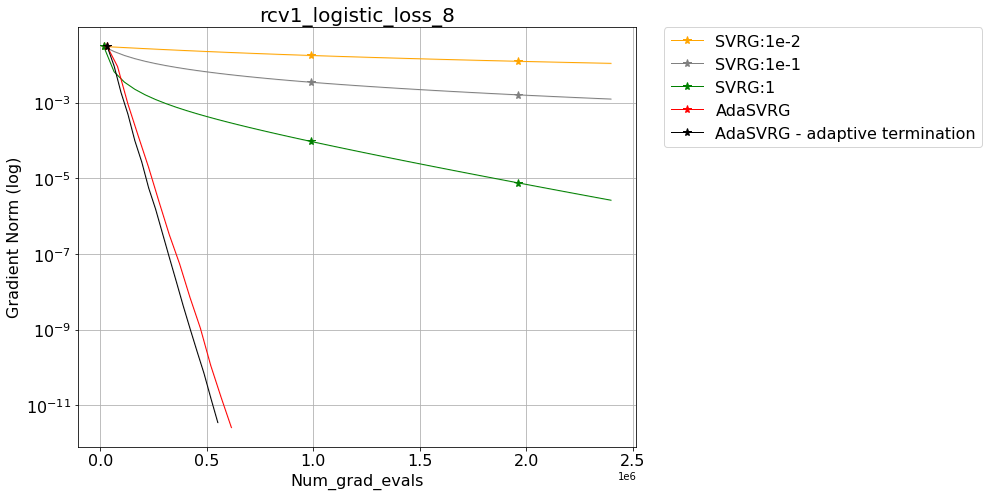

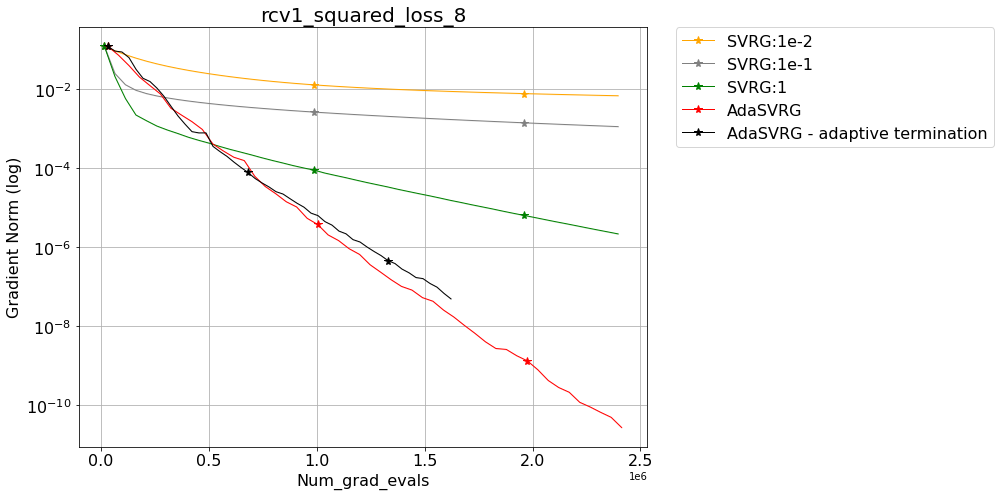

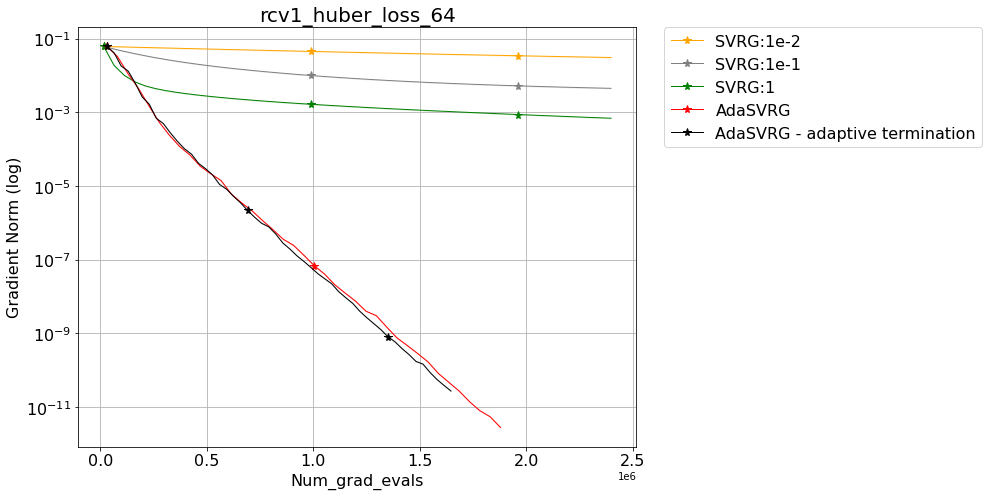

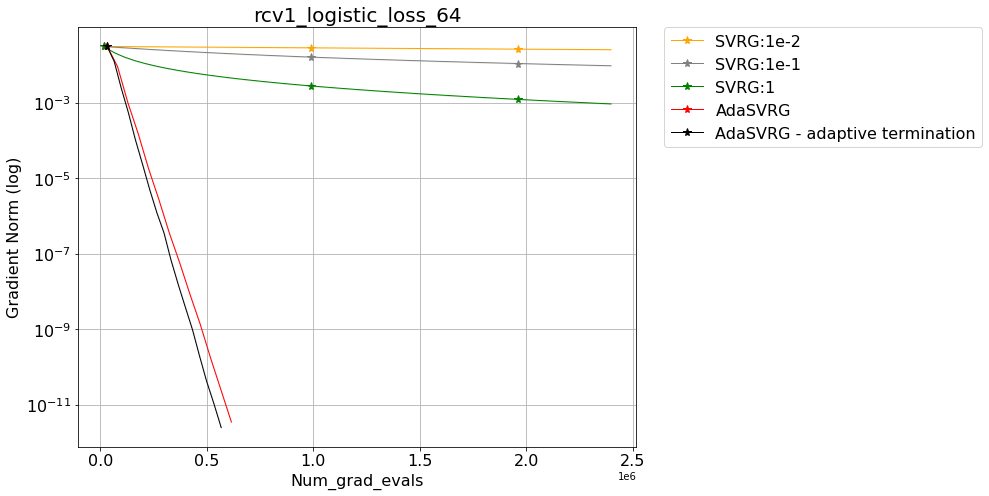

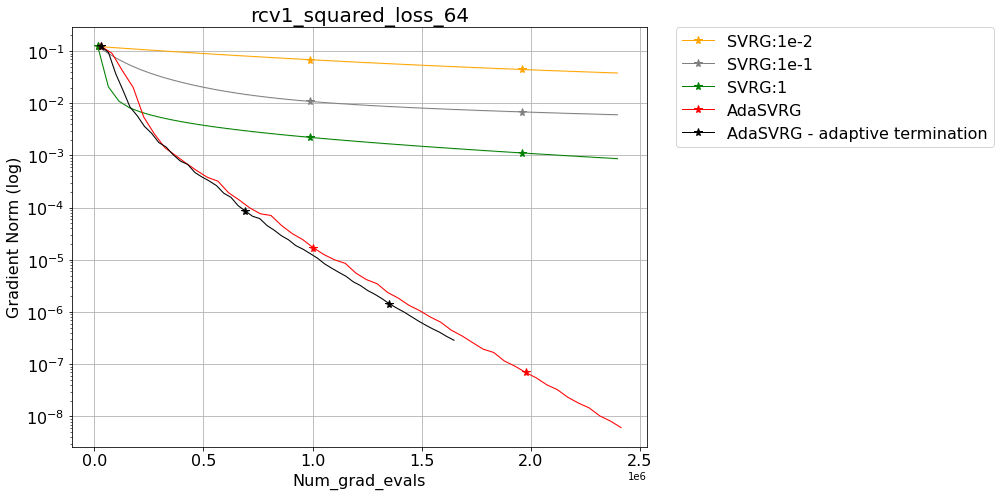

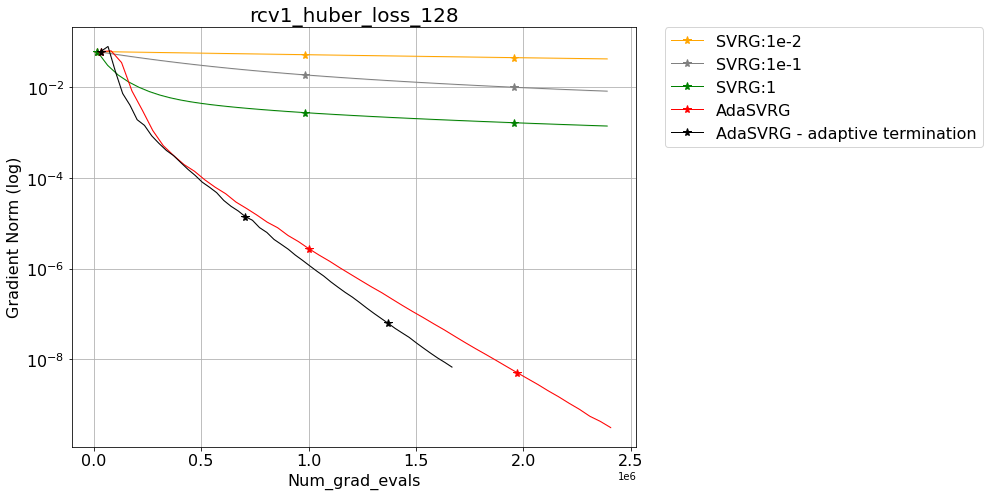

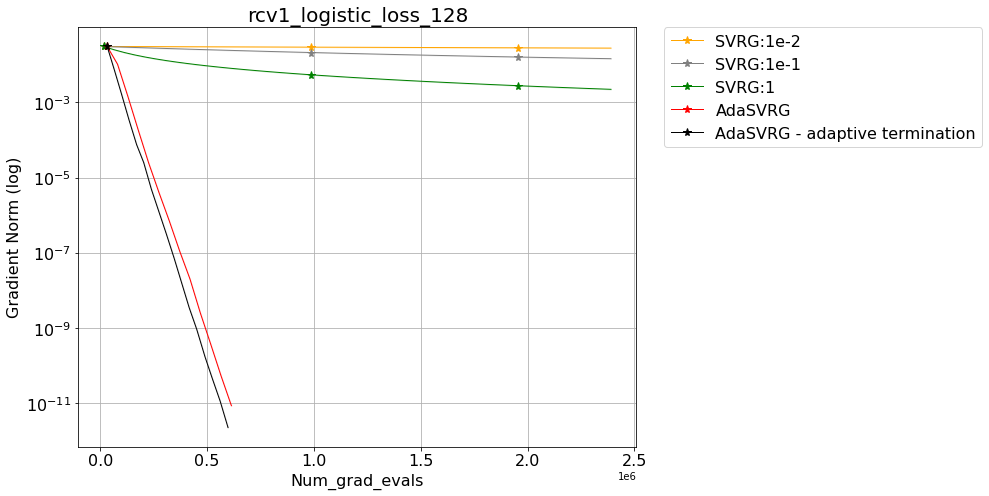

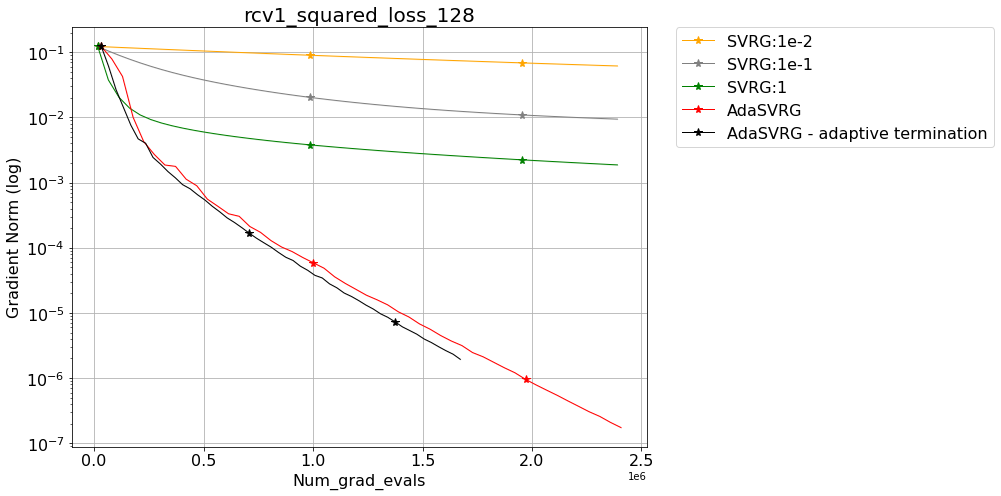

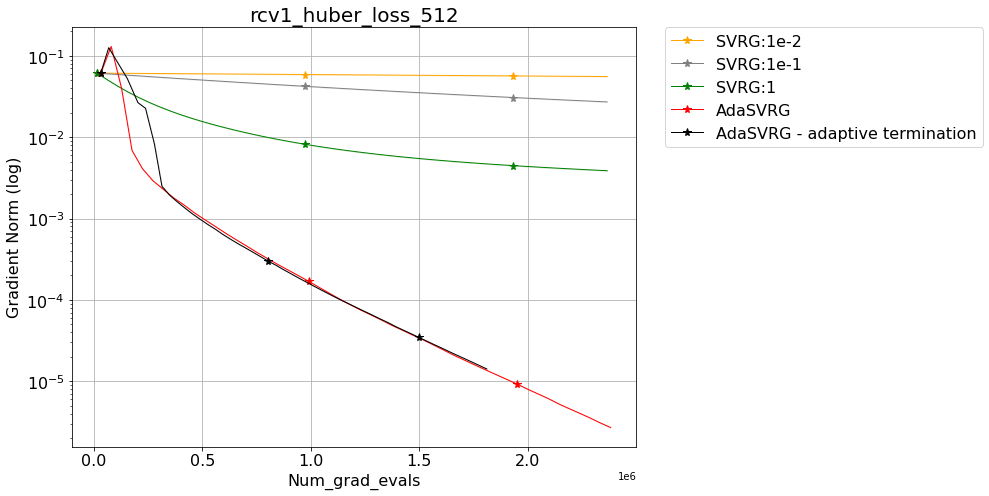

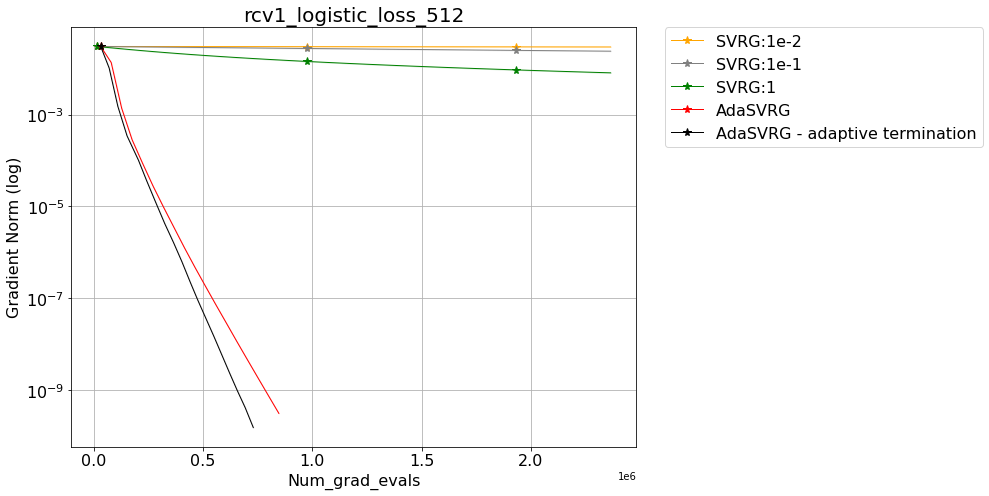

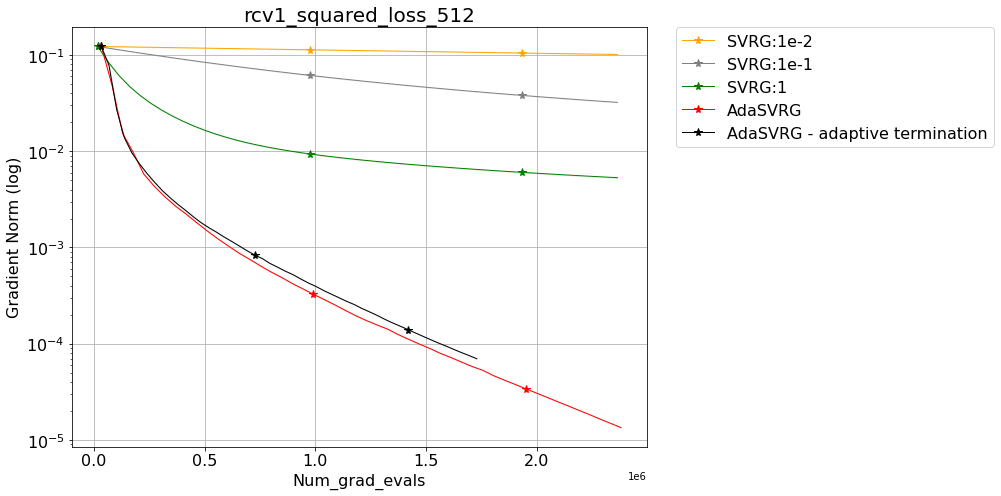

In [10]:
savedir_base = "./results_rcv1_main"
exp_config_fname = './exp_configs.py'
exp_list = []

for exp_group in [
    "exp_rcv1",
    ]:
    exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[exp_group]


# plotting the best configs against adagrad
for batch_size in [1, 8, 64, 128, 512]:
    filterby_list = [       
     #({'opt': {'name': 'svrg_ada', 'linesearch_option':1}, 'batch_size':batch_size}, 
       #{'style':styles['svrg_ada_old']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'adaptive_termination':0}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_new']}),
    
    ({'opt': {'name': 'svrg_ada', 'linesearch_option':20, 'threshold_at':1e-3}, 'batch_size':batch_size},
       {'style':styles['svrg_ada_at_1e-3']}),
        
    #({'opt': {'name': 'svrg_ada', 'linesearch_option':14, 'threshold_at':1e-4}, 'batch_size':batch_size},
     #  {'style':styles['svrg_ada_at_1e-4']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1e-3}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.001']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-2}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.01']}),
    
    ({'opt': {'name': 'svrg','init_step_size':1e-1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_0.1']}),
        
    ({'opt': {'name': 'svrg','init_step_size':1}, 'batch_size':batch_size}, 
       {'style':styles['svrg_1']}),
]

# get experiments
    rm = hr.ResultManager(exp_list=exp_list, 
                      filterby_list=filterby_list,
                      savedir_base=savedir_base, 
                      verbose=0, 
                      score_list_name='score_list.pkl'                      
                     )
#print(hr.filter_exp_list(rm.exp_list, filterby_list=filterby_list, savedir_base=savedir_base))

    rm.get_plot_all(
    avg_across='runs',
    order='groups_by_metrics',
                y_metric_list =  ['grad_norm'], 
                x_metric='n_grad_evals',
                legend_list=['opt.name', 'opt.adaptive_termination'], 
                title_list = ['dataset', 'loss_func', 'batch_size'], 
                groupby_list = ['loss_func', 'dataset'],
                log_metric_list = ['grad_norm'], 
                

                 legend_fontsize=16,
                  x_fontsize=16,
                  y_fontsize=16,
                  xtick_fontsize=16,
                  ytick_fontsize=16,
                  title_fontsize=20,
    

    map_ylabel_list=[{'grad_norm':'Gradient Norm'}, 
                    ],   
    map_xlabel_list=[{'n_grad_evals': 'Num_grad_evals'}],
                figsize=(14,7),
    plot_confidence=False,
            )
